<a href="https://colab.research.google.com/github/mohammadreza-mohammadi94/Data-Analysis-And-Machine-Learning-Projects/blob/master/2.%20Marketing%20and%20Customer%20Analysis/Predictive%20Modeling%20for%20Customer%20Churn%20In%20SaaS%20Company/Predictive_Modeling_for_Customer_Churn_in_a_Subscription_Based_SaaS_Company.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Project Definition & Objectives <a id=1></a>

**Project Title**: Predictive Modeling for Customer Churn in a Subscription-Based SaaS Company

[Dataset Source](https://www.kaggle.com/datasets/yeanzc/telco-customer-churn-ibm-dataset)


# 2. Import Libraries & Dataset <a id=2></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
!kaggle datasets download -d yeanzc/telco-customer-churn-ibm-dataset
!unzip /content/telco-customer-churn-ibm-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/yeanzc/telco-customer-churn-ibm-dataset
License(s): other
  0% 0.00/1.25M [00:00<?, ?B/s]
100% 1.25M/1.25M [00:00<00:00, 25.0MB/s]
Archive:  /content/telco-customer-churn-ibm-dataset.zip
  inflating: Telco_customer_churn.xlsx  


In [ ]:
df = pd.read_excel('/content/Telco_customer_churn.xlsx')
df.head()

CustomerID  Count        Country       State         City  Zip Code  \
0  3668-QPYBK      1  United States  California  Los Angeles     90003   
1  9237-HQITU      1  United States  California  Los Angeles     90005   
2  9305-CDSKC      1  United States  California  Los Angeles     90006   
3  7892-POOKP      1  United States  California  Los Angeles     90010   
4  0280-XJGEX      1  United States  California  Los Angeles     90015   

                 Lat Long   Latitude   Longitude  Gender  ...        Contract  \
0  33.964131, -118.272783  33.964131 -118.272783    Male  ...  Month-to-month   
1   34.059281, -118.30742  34.059281 -118.307420  Female  ...  Month-to-month   
2  34.048013, -118.293953  34.048013 -118.293953  Female  ...  Month-to-month   
3  34.062125, -118.315709  34.062125 -118.315709  Female  ...  Month-to-month   
4  34.039224, -118.266293  34.039224 -118.266293    Male  ...  Month-to-month   

  Paperless Billing             Payment Method  Monthly Charges Total Charges  \
0               Yes               Mailed check            53.85        108.15   
1               Yes           Electronic check            70.70        151.65   
2               Yes           Electronic check            99.65         820.5   
3               Yes           Electronic check           104.80       3046.05   
4               Yes  Bank transfer (automatic)           103.70        5036.3   

  Churn Label Churn Value Churn Score  CLTV                   Churn Reason  
0         Yes           1          86  3239   Competitor made better offer  
1         Yes           1          67  2701                          Moved  
2         Yes           1          86  5372                          Moved  
3         Yes           1          84  5003                          Moved  
4         Yes           1          89  5340  Competitor had better devices  

[5 rows x 33 columns]

# 3. Data Description <a id=3></a>

In [ ]:
df.info()

| Variable          | Description                                                                                                                                                                                                                  |
|-------------------|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| CustomerID        | A unique ID that identifies each customer.                                                                                                                                                                                   |
| Count             | A value used in reporting/dashboarding to sum up the number of customers in a filtered set.                                                                                                                                  |
| Country           | The country of the customer’s primary residence.                                                                                                                                                                             |
| State             | The state of the customer’s primary residence.                                                                                                                                                                               |
| City              | The city of the customer’s primary residence.                                                                                                                                                                                |
| Zip Code          | The zip code of the customer’s primary residence.                                                                                                                                                                            |
| Lat Long          | The combined latitude and longitude of the customer’s primary residence.                                                                                                                                                     |
| Latitude          | The latitude of the customer’s primary residence.                                                                                                                                                                            |
| Longitude         | The longitude of the customer’s primary residence.                                                                                                                                                                           |
| Gender            | The customer’s gender: Male, Female.                                                                                                                                                                                         |
| Senior Citizen    | Indicates if the customer is 65 or older: Yes, No.                                                                                                                                                                           |
| Partner           | Indicates if the customer has a partner: Yes, No.                                                                                                                                                                            |
| Dependents        | Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc.                                                                                                     |
| Tenure Months     | Indicates the total amount of months that the customer has been with the company by the end of the specified quarter.                                                                                                        |
| Phone Service     | Indicates if the customer subscribes to home phone service with the company: Yes, No.                                                                                                                                       |
| Multiple Lines    | Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No.                                                                                                                                 |
| Internet Service  | Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable.                                                                                                                     |
| Online Security   | Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No.                                                                                                             |
| Online Backup     | Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No.                                                                                                               |
| Device Protection | Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No.                                                                                |
| Tech Support      | Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No.                                                                                             |
| Streaming TV      | Indicates if the customer uses their Internet service to stream television programming from a third-party provider: Yes, No. The company does not charge an additional fee for this service.                               |
| Streaming Movies  | Indicates if the customer uses their Internet service to stream movies from a third-party provider: Yes, No. The company does not charge an additional fee for this service.                                               |
| Contract          | Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year.                                                                                                                                         |
| Paperless Billing | Indicates if the customer has chosen paperless billing: Yes, No.                                                                                                                                                            |
| Payment Method    | Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check.                                                                                                                                     |
| Monthly Charge    | Indicates the customer’s current total monthly charge for all their services from the company.                                                                                                                               |
| Total Charges     | Indicates the customer’s total charges, calculated to the end of the specified quarter.                                                                                                                                      |
| Churn Label       | Yes = the customer left the company this quarter. No = the customer remained with the company. Directly related to Churn Value.                                                                                            |
| Churn Value       | 1 = the customer left the company this quarter. 0 = the customer remained with the company. Directly related to Churn Label.                                                                                               |
| Churn Score       | A value from 0-100 that is calculated using a predictive tool (e.g., IBM SPSS Modeler). The model incorporates multiple factors known to cause churn. The higher the score, the more likely the customer will churn.      |
| CLTV              | Customer Lifetime Value. A predicted CLTV is calculated using corporate formulas and existing data. Higher values indicate more valuable customers who should be monitored for churn.                                      |
| Churn Reason      | A customer’s specific reason for leaving the company. Directly related to Churn Category.                                                                                                                                   |


In [ ]:
df.describe().T

# 4. Frequently Used Methods <a id=4></a>

In [ ]:
# Define a dictionary in order to use for plots to
# have better visualization.

# For plot's title
plot_title_dict = {'font': 'DejaVu Sans', 'weight': 'bold', 'fontsize': 15, 'color': 'darkblue'}
# For plot's axis
plot_axis_dict = {'font': 'DejaVu Sans', 'weight': 'bold', 'fontsize': 12, 'color': 'darkred'}

In [ ]:
def plot_categorical_bar(df,
                         categorical_column,
                         rot=None,
                         bar_width=0.5,
                         palette='dark',
                         figsize=(8, 5)):
    """
    This function creates a bar plot for a categorical variable using Seaborn with a deep color palette.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    categorical_column (str): The name of the categorical column to plot.

    Returns:
    None: Displays the bar plot.
    """
    # Set the Seaborn style for the plot
    sns.set(style="darkgrid")

    # Create the bar plot
    plt.figure(figsize=figsize)
    bar_plot = sns.countplot(x=categorical_column,
                             data=df,
                             width=bar_width,
                             palette=palette)

    # Add title and labels
    plt.title(f'Distribution of {categorical_column}',
              fontdict = plot_title_dict)
    plt.xlabel(categorical_column,
              fontdict = plot_axis_dict)
    plt.ylabel('Count',
              fontdict = plot_axis_dict)
    # Rotate x-axis labels for better readability (optional, depending on the data)
    plt.xticks(rotation=rot, ha='right')

    # Annotate counts above bars
    for p in bar_plot.patches:
        bar_plot.annotate(format(p.get_height(), '.0f'),
                          (p.get_x() + p.get_width() / 2., p.get_height()),
                          ha='center', va='center',
                          xytext=(0, 5),
                          textcoords='offset points',
                          fontweight='bold',
                          color='black')
    # Show the plot
    plt.tight_layout()
    plt.show()

def hist_plot(
            df,
            x,
            rot=None,
            bins=150,
            figsize=(8, 5)):
    """
    Plots a histogram for a specified numerical column from a DataFrame.

    This function creates a histogram using Seaborn's `histplot` to show the
    distribution of a numerical variable, with options to customize the
    number of bins, figure size, and rotation of x-axis labels.

    Parameters:
    -----------
    df : pd.DataFrame
        The DataFrame containing the data to plot.
    x : str
        The name of the numerical column to plot the histogram for.
    rot : int or None, optional
        The angle to rotate the x-axis labels, useful for readability with long labels.
    bins : int, default=150
        The number of bins for the histogram.
    figsize : tuple, default=(8, 5)
        The width and height of the figure in inches.

    Returns:
    --------
    None
        Displays the histogram plot with title and axis labels formatted based on predefined style dictionaries.
    """
    plt.figure(figsize=figsize)
    sns.set_style('darkgrid')

    # Use sns.histplot instead of sns.distplot
    sns.histplot(data=df, x=x, bins=bins)

    # Add title and labels with font styling
    plt.title(f"Distribution of {x}", fontdict=plot_title_dict)
    plt.xlabel(f"{x}", fontdict=plot_axis_dict)
    plt.ylabel("Frequency", fontdict=plot_axis_dict)

    # Adjust layout
    plt.tight_layout()
    plt.xticks(rotation=rot)  # Rotate x-ticks if specified
    plt.show()

def scatter_plot(df,
                 x_column,
                 y_column,
                 hue_column=None,
                 size=5,
                 palette='dark'):
    """
    Plots a scatter plot using Seaborn to show the relationship between two variables.

    Parameters:
    -----------
    df : pd.DataFrame
        The DataFrame containing the data to plot.
    x_column : str
        The name of the column for the x-axis.
    y_column : str
        The name of the column for the y-axis.
    hue_column : str or None, optional
        The column to use for color encoding, useful for adding an additional categorical variable.
    size : int, default=5
        The size of the markers in the scatter plot.
    palette : str, default='rocket'
        The color palette to use if hue is specified.

    Returns:
    --------
    None
        Displays the scatter plot with axis labels and a title.
    """
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=df,
                    x=x_column,
                    y=y_column,
                    hue=hue_column,
                    palette=palette,
                    s=size*10)

    # Add title and labels with styling
    plt.title(f'Scatter Plot of {y_column} vs {x_column}', fontdict=plot_title_dict)
    plt.xlabel(x_column, fontdict=plot_axis_dict)
    plt.ylabel(y_column, fontdict=plot_axis_dict)

    # Display legend if hue is specified
    if hue_column:
        plt.legend(title=hue_column, loc='upper right')

    plt.tight_layout()
    plt.show()

def box_plot(df,
             x_col,
             y_col,
             hue_col=None,
             palette="dark",
             figsize=(12, 6)):
    """
    Creates a box plot to compare the distribution of a numeric variable
    across different categories and optionally grouped by a secondary
    categorical variable.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    x_col (str): The name of the categorical column on the x-axis.
    y_col (str): The name of the numeric column on the y-axis.
    hue_col (str, optional): A secondary categorical variable to further group
                             the data by color. Default is None.
    figsize (tuple, optional): Figure size for the plot. Default is (12, 6).

    Returns:
    None: Displays the box plot.

    """
    plt.figure(figsize=figsize)
    sns.boxplot(data=df,
                x=x_col,
                y=y_col,
                hue=hue_col,
                palette=palette)
    plt.title(f'{y_col} by {x_col} and {hue_col}', fontdict=plot_title_dict)
    plt.xlabel(x_col, fontdict=plot_axis_dict)
    plt.ylabel(y_col, fontdict=plot_axis_dict)
    plt.legend(title=hue_col)
    plt.show()

def count_grouped_by_status(df, status_value, filter_feature, groupby_feature="Churn Label"):
    """
    Filters the DataFrame based on a specified feature and value,
    then groups by another feature and counts the occurrences within each group.

    Parameters:
    - df (pd.DataFrame): The DataFrame containing the data.
    - status_value (str): The value of the filter feature to filter on (e.g., 'Yes' or 'No').
    - groupby_feature (str): The column name to group by (e.g., 'Churn Label').
    - filter_feature (str): The column name to filter on (e.g., 'Senior Citizen').

    Returns:
    - pd.Series: A count of each group within the specified filter.
    """
    filtered_df = df[df[filter_feature] == status_value]
    grouped_counts = filtered_df.groupby(groupby_feature)[groupby_feature].count()
    return grouped_counts

# 5. Exploratory Data Analysis <a id=5></a>

## 5.1 Categorical Variable's Countplot <a id=5.1></a>

In [ ]:
plot_categorical_bar(df, 'Country', bar_width=0.3)

In [ ]:
plot_categorical_bar(df, 'State', bar_width=0.3)

In [ ]:
plot_categorical_bar(df, 'Gender')

In [ ]:
plot_categorical_bar(df, 'Senior Citizen')

In [ ]:
plot_categorical_bar(df, 'Partner')

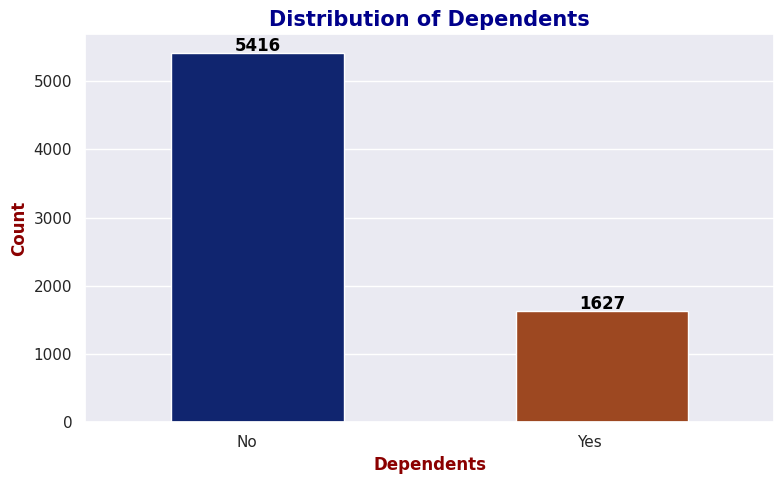

In [ ]:
plot_categorical_bar(df, 'Dependents')

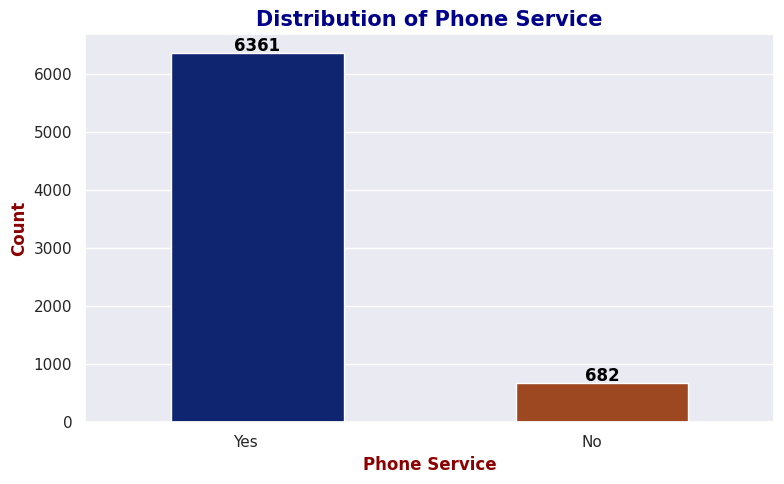

In [ ]:
plot_categorical_bar(df, 'Phone Service')

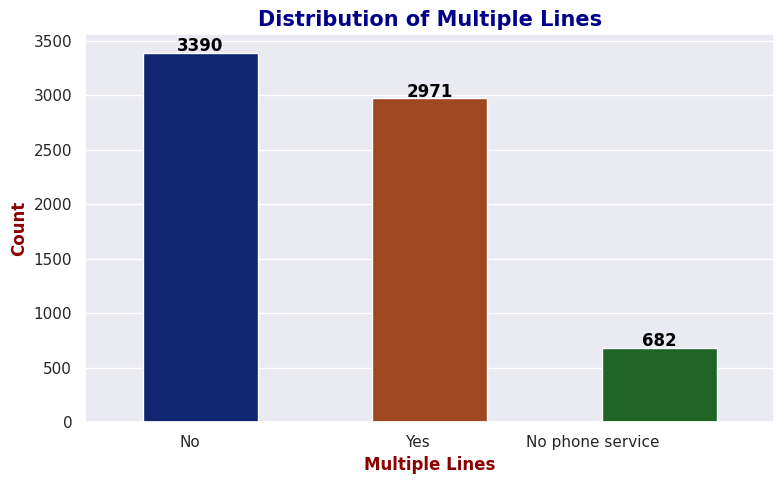

In [ ]:
plot_categorical_bar(df, 'Multiple Lines')

In [ ]:
plot_categorical_bar(df, 'Internet Service')

In [ ]:
plot_categorical_bar(df, 'Online Security')

In [ ]:
plot_categorical_bar(df, 'Online Backup')

In [ ]:
plot_categorical_bar(df, 'Device Protection')

In [ ]:
plot_categorical_bar(df, 'Tech Support')

In [ ]:
plot_categorical_bar(df, 'Streaming TV')

In [ ]:
plot_categorical_bar(df, 'Streaming Movies')

In [ ]:
plot_categorical_bar(df, 'Contract')

In [ ]:
plot_categorical_bar(df, 'Paperless Billing')

In [ ]:
plot_categorical_bar(df, 'Payment Method', rot=20, figsize=(8, 6))

In [ ]:
plot_categorical_bar(df, 'Churn Label')

* All customers are from Unites States and California.
* Customers are from 1129 unique cities from CA, which top ten cities are: 'Los Angeles', 'San Diego', 'San Jose', 'Sacramento', 'San Francisco','Fresno','LongBeach', 'Oakland', 'Stockton', 'Bakersfield'
* Customer's gender is almost equal. Male customers are 3555 and Female are 3488.
* There 3042 customers that living with their partner. Moreover 1627 of them are living with one of their relatives (Child, Parents,...). From this we can assume that 1928 of customers are couples. We will try to check this further.
* More than 90% of customers use Phone Service.
* 2971 of customers using multiple phone lines, while 3390 of customers do not. 682 of customers does not have any phone service.
* About 90% of customers are using Internet Service from company while 1526 of them do not use internet service. 2421 are using DSL and 3096 are using Fiber Optic.
* Distribution of Online Security indicates that about 50% of customers are not using Online Security features. Also 43% of customers does not have Online Backup.
* Furthermore from plots we can understand that 1526 of customers do not have Internet Service , so they do not have some services such as `Online Security, Online Backup, Device Protection, Tech Support, Streaming TV and Streaming Movies`. This about is about 21% of customers within this dataset.
* About 50% of customers are not using Tech Support and 30% of them are using this service. (About 21% of customer do not have Internet Service)
* Almost 40% of clients are using services such as Streaming TV and Streaming Movies while 40% of them do not use these services.(About 21% of customer do not have Internet Service)
* Contracts are as below:
    - Month to Month subscriptions are 3875 which is 55.01%
    - Two year subscriptions are 1695 which is 24.06%
    - One year subscriptions are 1473 which is 20.91%
* Subscription renewal are:
    - Mailed check: 1612 customers which is 22.88%
    - Electronic check: 2365 customers which is 33.57%
    - Bank transfer(automatic): 1544 customers which is 21.92
    - Credit card (automatic): 1522 customers which is 21.61%
* Finally, 5174 of customers remained with company which means 73.46% and 1869 of customers didnt renewed their subscription which means 26.54%.

## 5.2 Histplot <a id=5.2></a>

In [ ]:
hist_plot(df, 'Tenure Months')

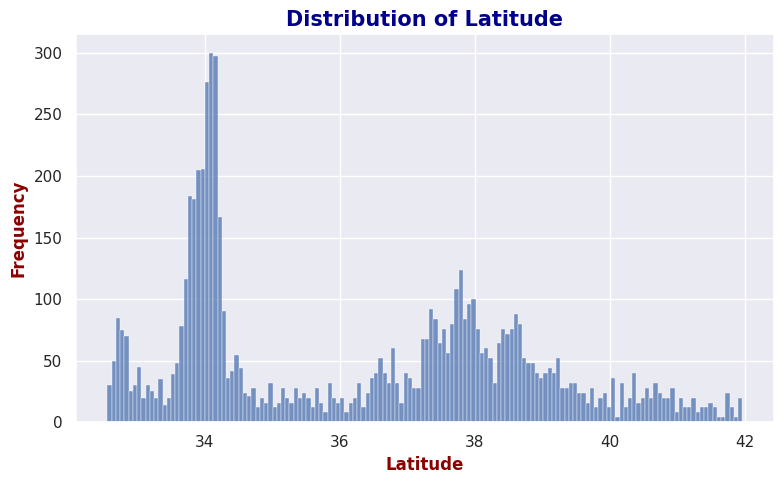

In [ ]:
hist_plot(df, 'Latitude')

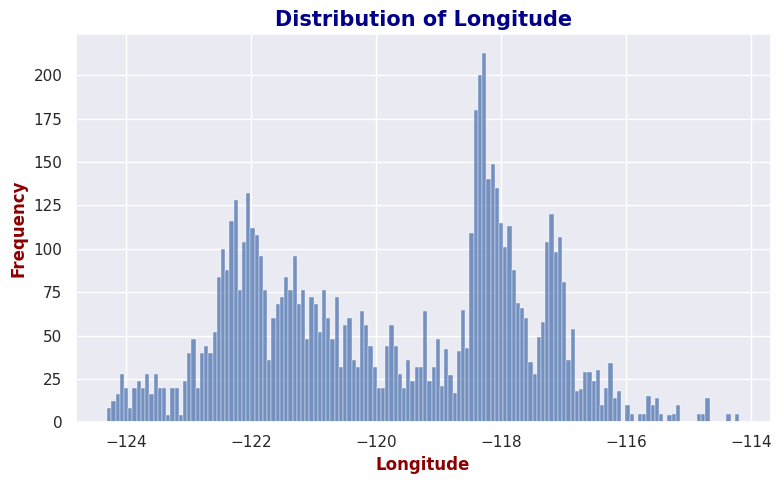

In [ ]:
hist_plot(df, 'Longitude')

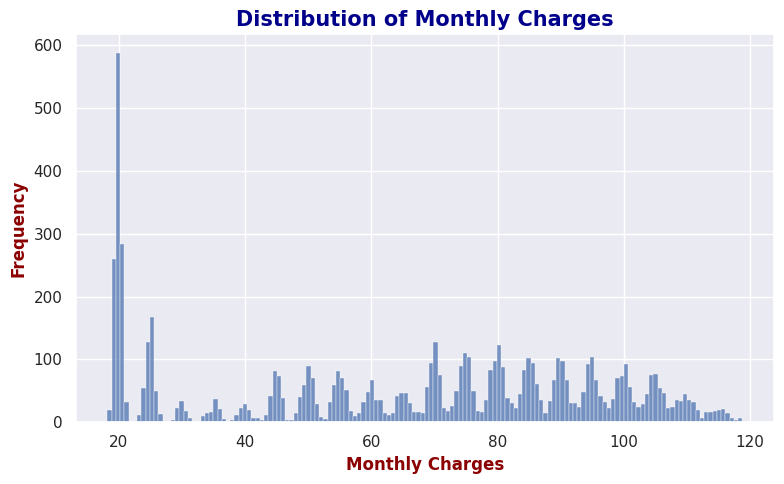

In [ ]:
hist_plot(df, 'Monthly Charges')

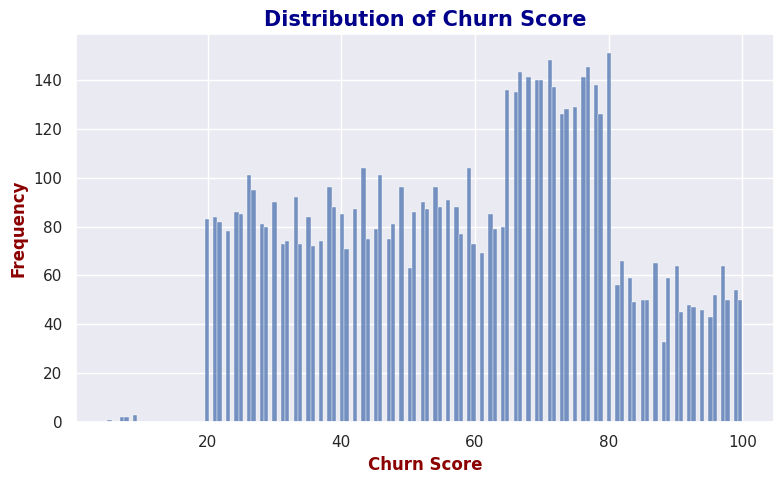

In [ ]:
hist_plot(df, 'Churn Score')

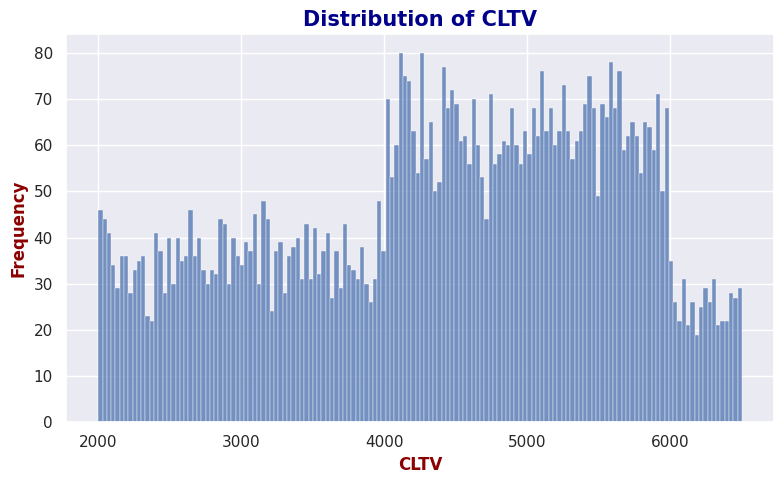

In [ ]:
hist_plot(df, 'CLTV')

## 5.3 Scatter Plot <a id=5.3></a>

In [ ]:
# Correct datatype of Total Charges to float.
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')

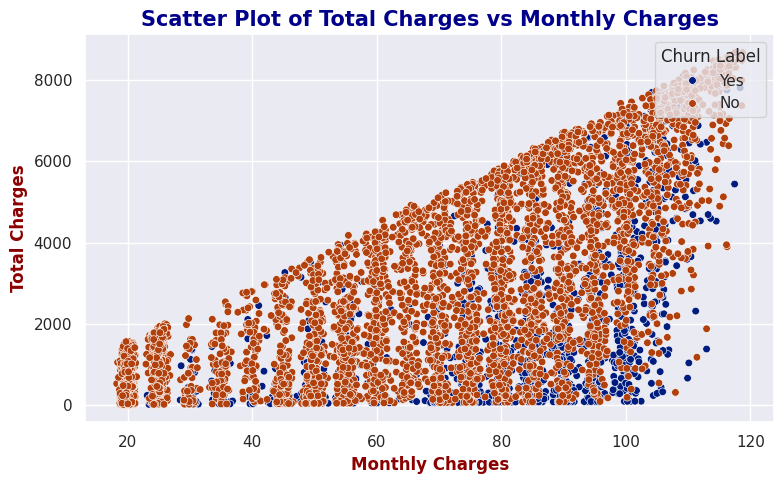

In [ ]:
scatter_plot(df, 'Monthly Charges', 'Total Charges', hue_column='Churn Label', size=3)

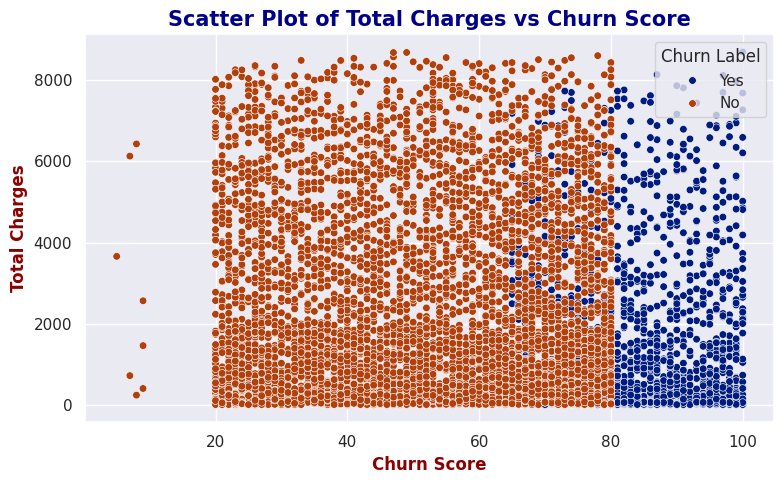

In [ ]:
scatter_plot(df, 'Churn Score', 'Total Charges', hue_column='Churn Label', size=3)

* **Churn Score**:A value from 0-100 that is calculated using a predictive tool (e.g., IBM SPSS Modeler). The model incorporates multiple factors known to cause churn. The higher the score, the more likely the customer will churn.
  
> It seems that total charges does not have that much impact to clients to Churn, because we can see from above scatter plot that as Total Charges increase, number of clients that already Churn decreases. It show us that we have to search further in data.

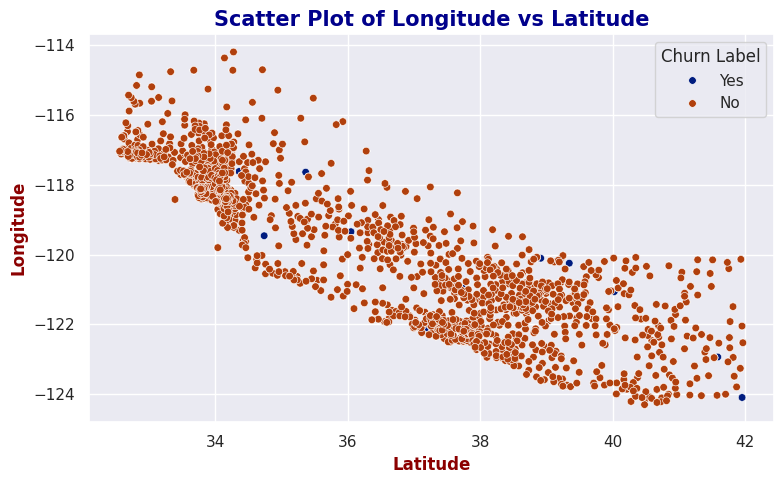

In [ ]:
scatter_plot(df, 'Latitude', 'Longitude', hue_column='Churn Label', size=3)

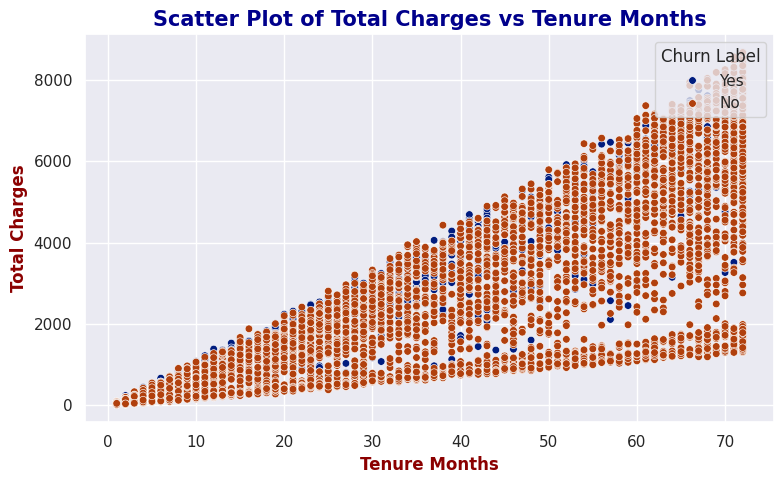

In [ ]:
scatter_plot(df, 'Tenure Months', 'Total Charges', hue_column='Churn Label', size=3)

## 5.4 Boxplot <a id=5.4></a>

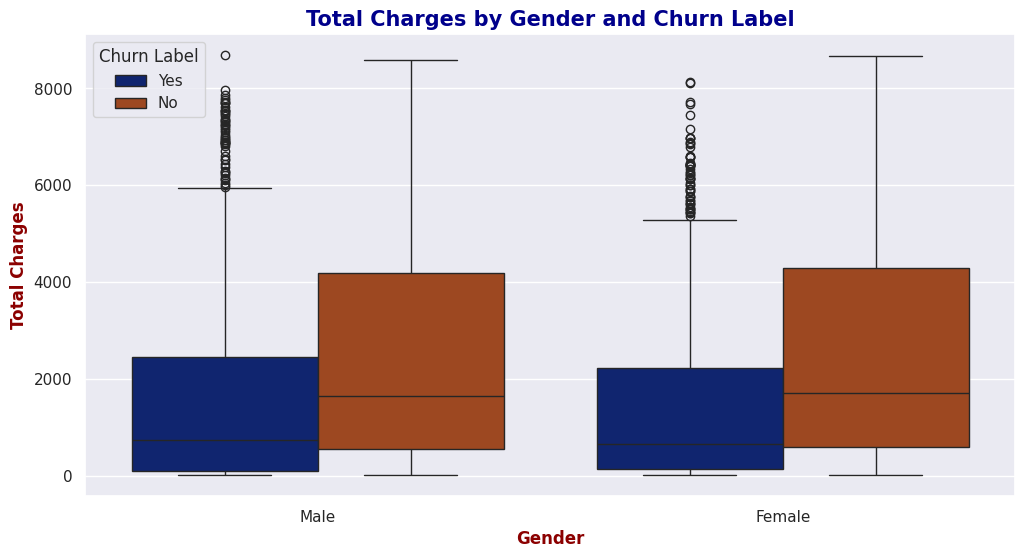

In [ ]:
box_plot(df, 'Gender', 'Total Charges', 'Churn Label')

In [ ]:
count_grouped_by_status(df, 'Male', 'Gender')

Churn Label
No     2625
Yes     930
Name: Churn Label, dtype: int64

In [ ]:
count_grouped_by_status(df, 'Female', 'Gender')

Churn Label
No     2549
Yes     939
Name: Churn Label, dtype: int64

* Average Of Total Charges for both Men and women, who churn and who not, is same.

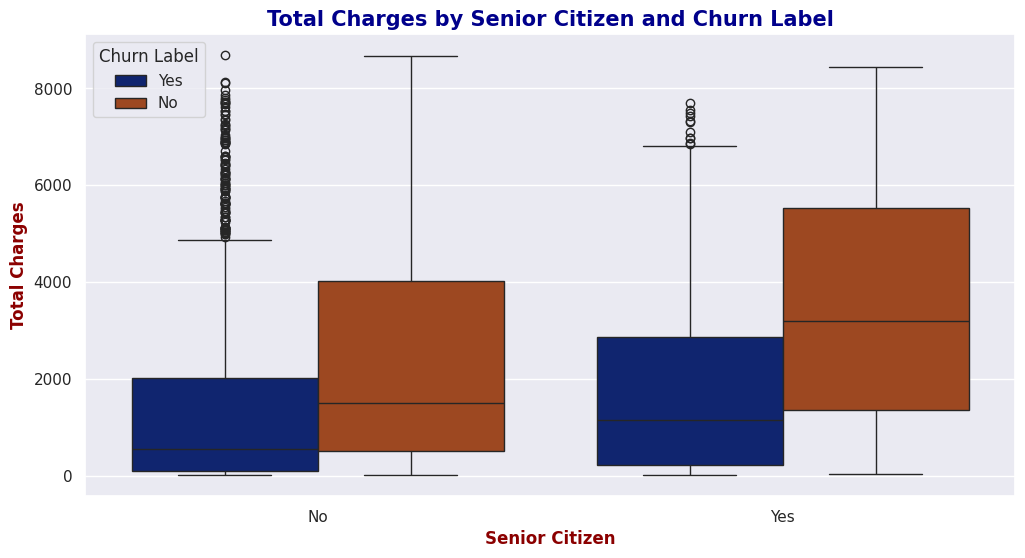

In [ ]:
box_plot(df, 'Senior Citizen', 'Total Charges', 'Churn Label')

* Customers that are not Senior Citizen:
    * Customers that churn: Less than 1000$ per tenure. The total charges range between approx 10$ to 2000$ per tenure.
    * Customers that didnt churn: Abaout 1800$ per tenure. the total charges range between 250$ to 4000$ per tenure.
* Customers that are Senior Citizen:
    * Average total charges for customers who churn is about 1000$ and range between approx. 100$ to ~2000$.
    * Average total charges for customers who not churn is ~2700$ and range between 1200$ to 5800$.

> We can assume that Senior Citizen are more intend to stay loyal with company to keep themselfs entertained. But what about price ? does it have any impact on customers satisfaction ?

In [ ]:
count_grouped_by_status(df, 'Yes', 'Senior Citizen')

Churn Label
No     666
Yes    476
Name: Churn Label, dtype: int64

In [ ]:
count_grouped_by_status(df, 'No', 'Senior Citizen')

Churn Label
No     4508
Yes    1393
Name: Churn Label, dtype: int64

* By analyzing above tables there are few points that we can understand.
    1. Totally 1142 of customers are Senior Citizen that 476 of them already churn. This means 41.68% of Senior Citizen were not loyal and they left.
    2. There are 5901 customer that are not Senior Citizen, while 1393 of them already churn which is about 23.60%.
> So the assumption that Senior Citizens are more loyal is rejected. One the main reason is that data of Senior and Non-Senior Citizen are imbalanced.

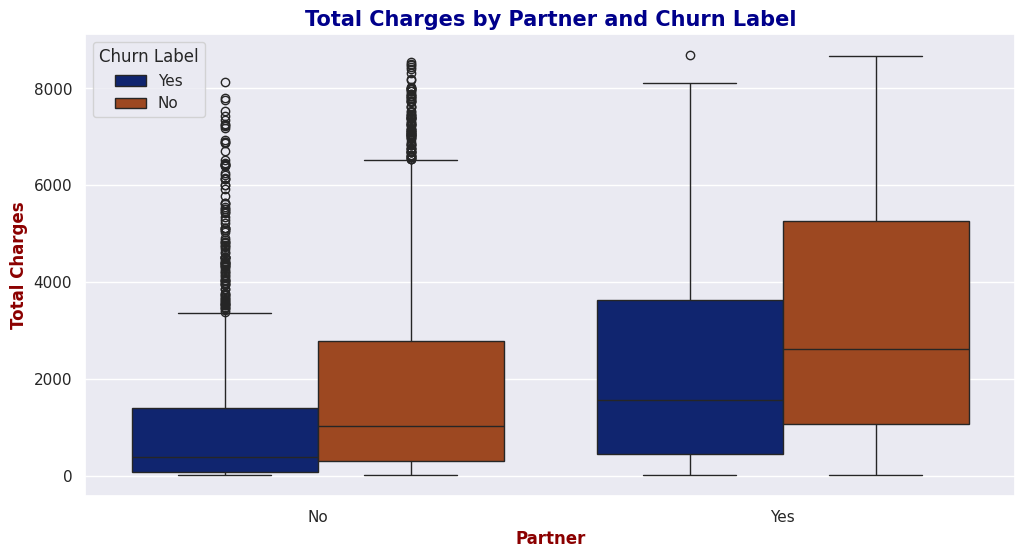

In [ ]:
box_plot(df, 'Partner', 'Total Charges', 'Churn Label')

* The number of clients that are living with a partner is almost balanced.
    * 3641 of clients are living alone.
    * 3402 of clinets are couple.
* By analyzing above chart we can see that customer who are couple are more intend to stay loyal.

In [ ]:
count_grouped_by_status(df, 'Yes', 'Partner')

Churn Label
No     2733
Yes     669
Name: Churn Label, dtype: int64

In [ ]:
count_grouped_by_status(df, 'No', 'Partner')

Churn Label
No     2441
Yes    1200
Name: Churn Label, dtype: int64

* As obiviously is clear from above tables that about half of customers who are single are very likely to Churn, while only 19.66% of customer whom are Cuple are likely to churn.

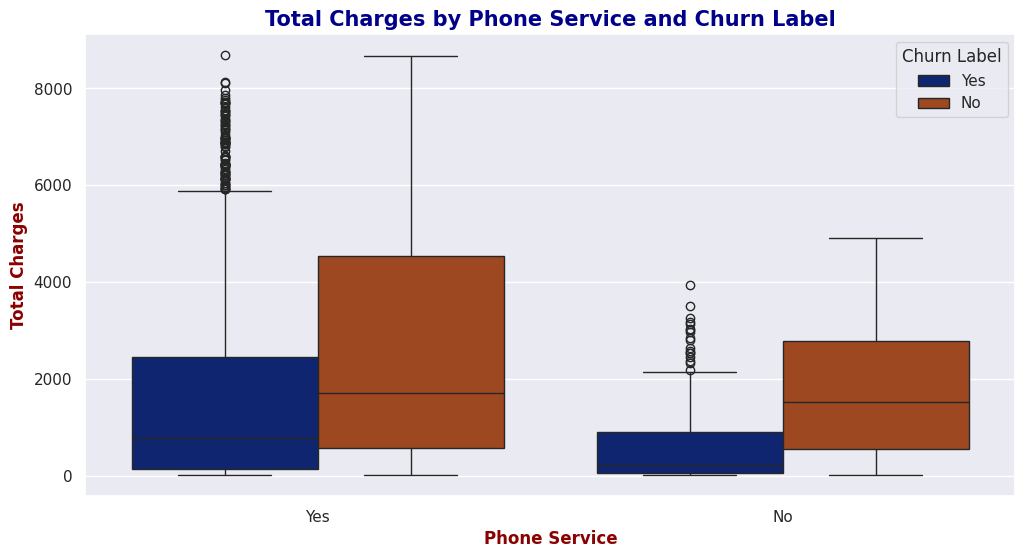

In [ ]:
box_plot(df, 'Phone Service', 'Total Charges', 'Churn Label')


* **Churn and Total Charges Distribution**: Customers without phone service who did not churn tend to have lower total charges than those with phone service.
* **Churn Label Impact**: Customers with phone service show higher total charges on average compared to those without phone service, particularly among non-churned customers.
* **Boxplot Spread**: The range of total charges is wider for customers with phone service, indicating a higher variability in their billing compared to customers without phone service.
* **Outliers**: The "Yes" churn group with phone service has many high-charge outliers, suggesting some high-paying customers still choose to leave.
* **Median Total Charges**: For customers without phone service, the median total charge is relatively low in both churn and non-churn groups, possibly indicating less lucrative customer segments.

These insights can help target customer segments based on service type and churn behavior.

In [ ]:
count_grouped_by_status(df, "Yes", 'Phone Service')

Churn Label
No     4662
Yes    1699
Name: Churn Label, dtype: int64

In [ ]:
count_grouped_by_status(df, "No", 'Phone Service')

Churn Label
No     512
Yes    170
Name: Churn Label, dtype: int64

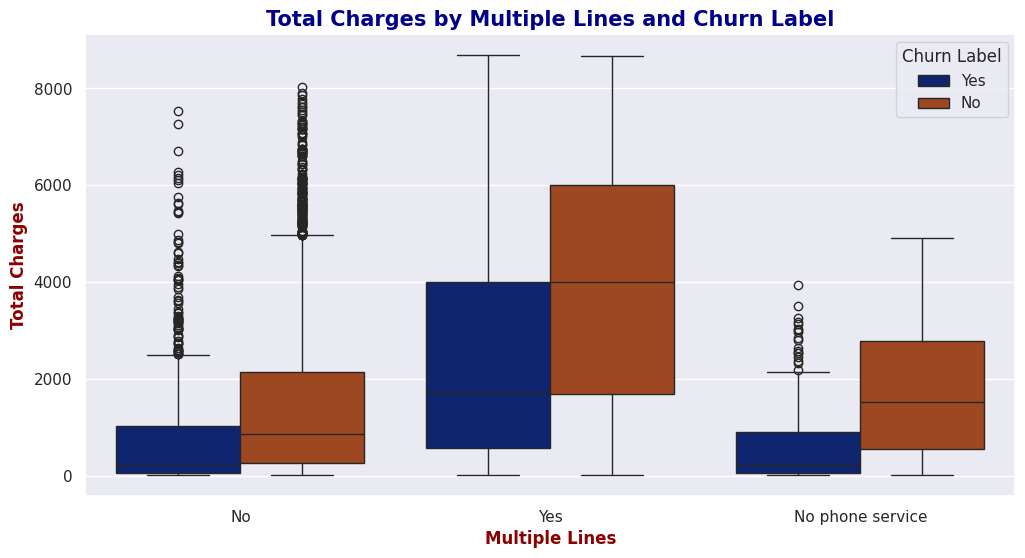

In [ ]:
box_plot(df, 'Multiple Lines', 'Total Charges', 'Churn Label')

In [ ]:
count_grouped_by_status(df, 'No', 'Multiple Lines')

Churn Label
No     2541
Yes     849
Name: Churn Label, dtype: int64

In [ ]:
count_grouped_by_status(df, 'Yes', 'Multiple Lines')

Churn Label
No     2121
Yes     850
Name: Churn Label, dtype: int64

In [ ]:
count_grouped_by_status(df, 'No phone service', 'Multiple Lines')

Churn Label
No     512
Yes    170
Name: Churn Label, dtype: int64

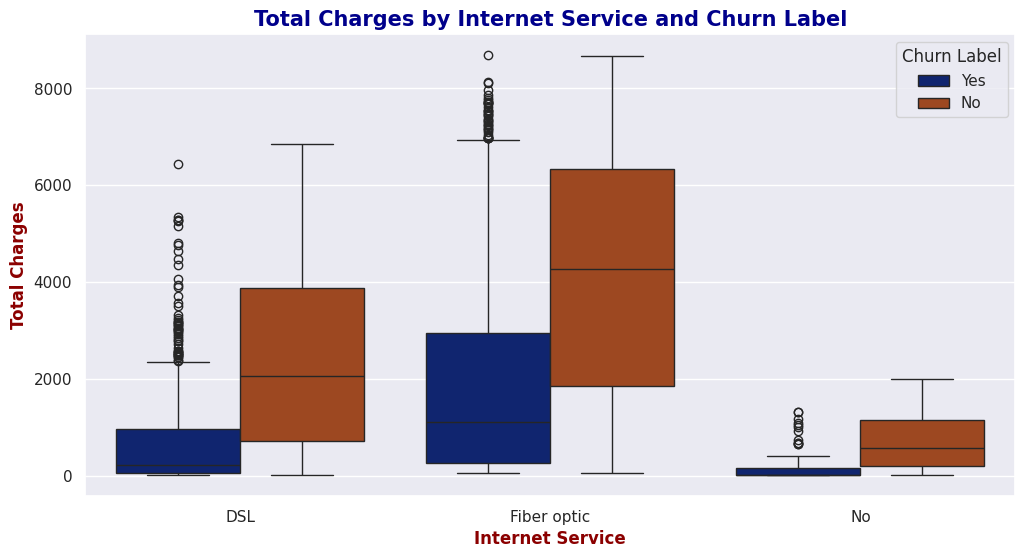

In [ ]:
box_plot(df, 'Internet Service', 'Total Charges', 'Churn Label')

* Churn Rate and Internet Service Type: Customers using Fiber Optic tend to have higher total charges and are more likely to churn compared to those using DSL.

* Lower Churn for No Internet Service: Customers without Internet Service have the lowest total charges and seem less likely to churn, indicating a possible relationship between internet service and churn.

* Distribution of Charges for DSL: For DSL users, churners generally have higher charges than non-churners, though this difference is not as pronounced as with Fiber Optic users.

* Charge Variability in Fiber Optic Users: Fiber Optic users show greater variability in total charges among churners, suggesting that high-cost plans might contribute to churn.

* Outliers: There are notable outliers, especially for Fiber Optic users who did not churn, showing some customers pay significantly higher charges without leaving.

In [ ]:
count_grouped_by_status(df, 'DSL', 'Internet Service')

Churn Label
No     1962
Yes     459
Name: Churn Label, dtype: int64

In [ ]:
count_grouped_by_status(df, 'Fiber optic', 'Internet Service')

Churn Label
No     1799
Yes    1297
Name: Churn Label, dtype: int64

In [ ]:
count_grouped_by_status(df, 'No', 'Internet Service')

Churn Label
No     1413
Yes     113
Name: Churn Label, dtype: int64

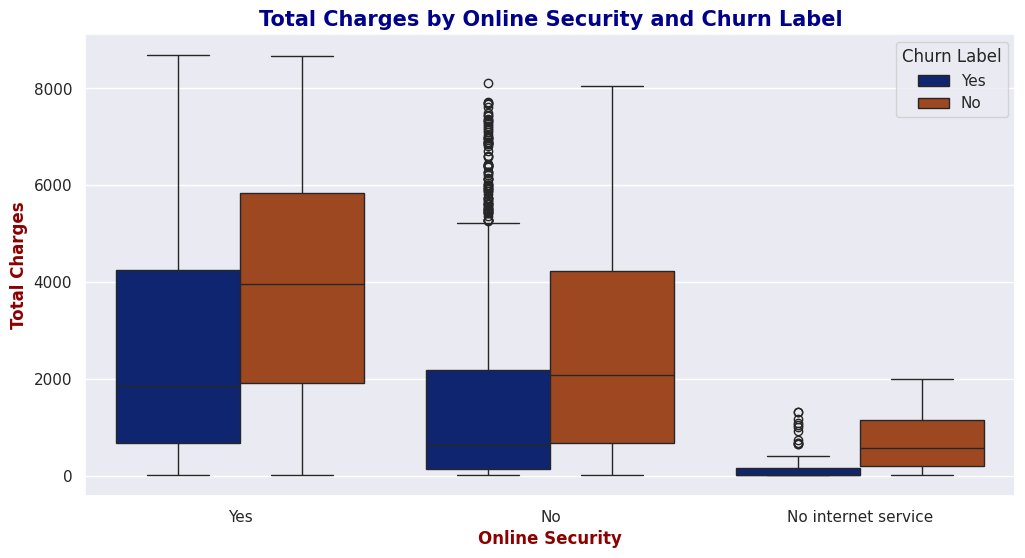

In [ ]:
box_plot(df, 'Online Security', 'Total Charges', 'Churn Label')

* Customers without online security show a higher median total charge for those who have not churned compared to those who have churned, suggesting that online security could be linked to customer retention.

* Among customers with online security, the median total charges for churned and non-churned are closer in value, indicating a smaller impact on churn rate for this group.

* Customers without internet service have the lowest total charges across both churn and non-churn groups, likely due to fewer services utilized.

In [ ]:
count_grouped_by_status(df, 'Yes', 'Online Security')

Churn Label
No     1724
Yes     295
Name: Churn Label, dtype: int64

In [ ]:
count_grouped_by_status(df, 'No', 'Online Security')

Churn Label
No     2037
Yes    1461
Name: Churn Label, dtype: int64

In [ ]:
count_grouped_by_status(df, 'No internet service', 'Online Security')

Churn Label
No     1413
Yes     113
Name: Churn Label, dtype: int64

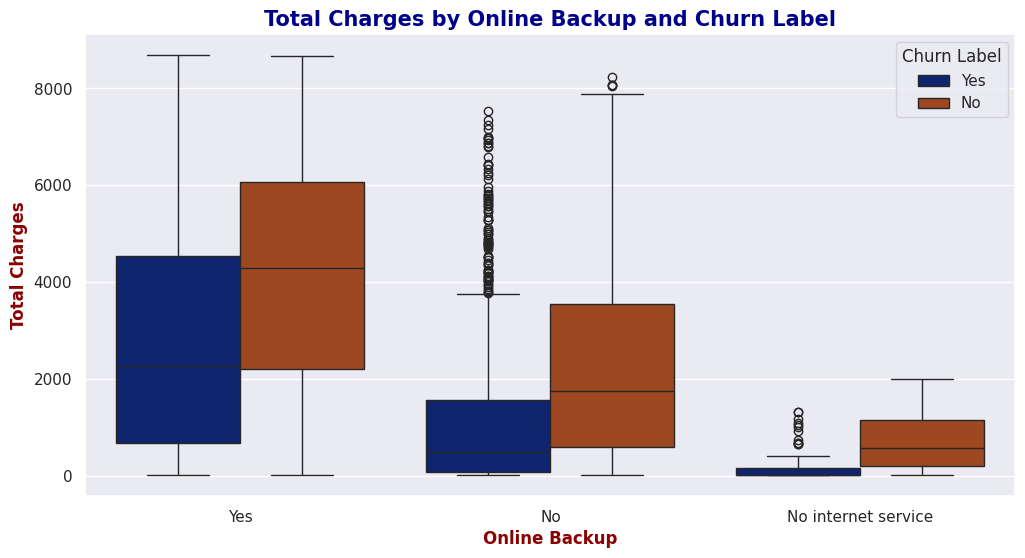

In [ ]:
box_plot(df, 'Online Backup', 'Total Charges', 'Churn Label')

In [ ]:
count_grouped_by_status(df, 'Yes', 'Online Backup')

Churn Label
No     1906
Yes     523
Name: Churn Label, dtype: int64

In [ ]:
count_grouped_by_status(df, 'No', 'Online Backup')

Churn Label
No     1855
Yes    1233
Name: Churn Label, dtype: int64

In [ ]:
count_grouped_by_status(df, 'No internet service', 'Online Backup')

Churn Label
No     1413
Yes     113
Name: Churn Label, dtype: int64

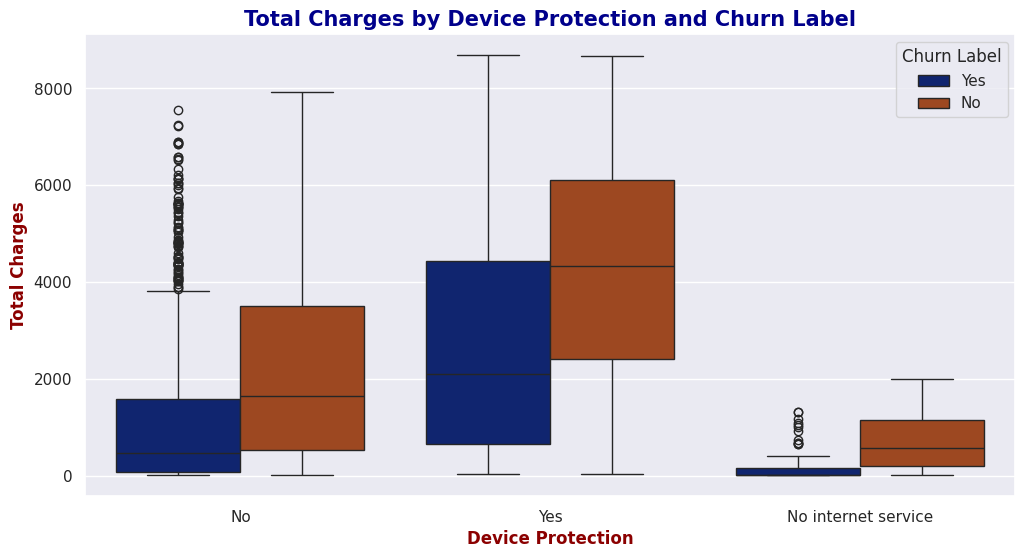

In [ ]:
box_plot(df, 'Device Protection', 'Total Charges', 'Churn Label')

In [ ]:
count_grouped_by_status(df, 'No', 'Device Protection')

Churn Label
No     1884
Yes    1211
Name: Churn Label, dtype: int64

In [ ]:
count_grouped_by_status(df, 'Yes', 'Device Protection')

Churn Label
No     1877
Yes     545
Name: Churn Label, dtype: int64

In [ ]:
count_grouped_by_status(df, 'No internet service', 'Device Protection')

Churn Label
No     1413
Yes     113
Name: Churn Label, dtype: int64

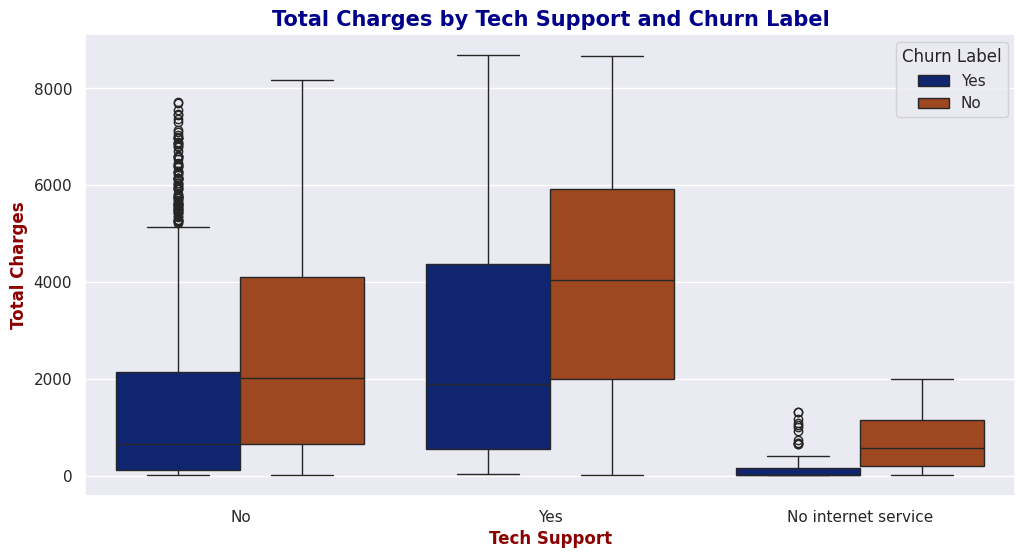

In [ ]:
box_plot(df, 'Tech Support', 'Total Charges', 'Churn Label')

In [ ]:
count_grouped_by_status(df, 'Yes', 'Tech Support')

Churn Label
No     1734
Yes     310
Name: Churn Label, dtype: int64

In [ ]:
count_grouped_by_status(df, 'No', 'Tech Support')

Churn Label
No     2027
Yes    1446
Name: Churn Label, dtype: int64

In [ ]:
count_grouped_by_status(df, 'No internet service', 'Tech Support')

Churn Label
No     1413
Yes     113
Name: Churn Label, dtype: int64

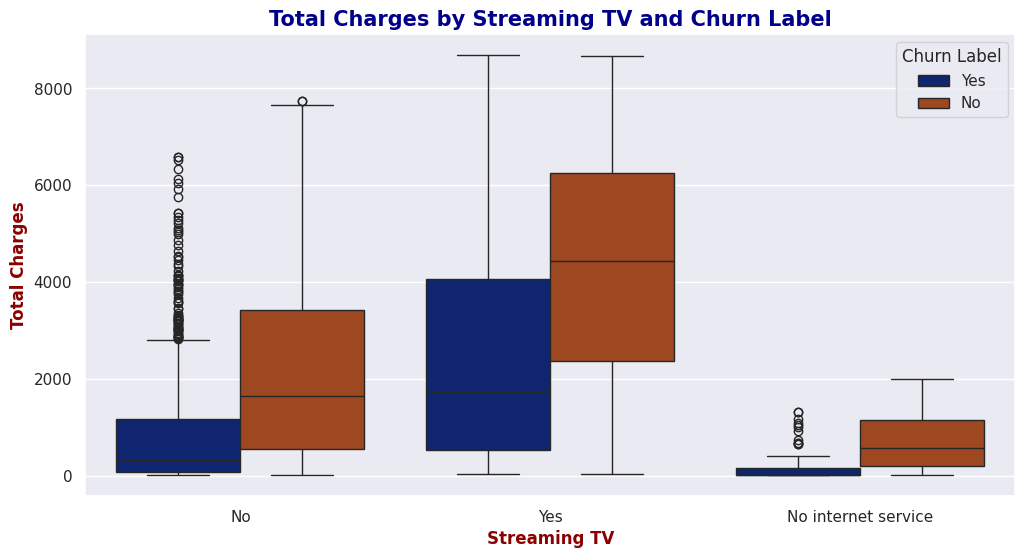

In [ ]:
box_plot(df, 'Streaming TV', 'Total Charges', 'Churn Label')

In [ ]:
count_grouped_by_status(df, 'No', 'Streaming TV')

Churn Label
No     1868
Yes     942
Name: Churn Label, dtype: int64

In [ ]:
count_grouped_by_status(df, 'Yes', 'Streaming TV')

Churn Label
No     1893
Yes     814
Name: Churn Label, dtype: int64

In [ ]:
count_grouped_by_status(df, 'No internet service', 'Streaming TV')

Churn Label
No     1413
Yes     113
Name: Churn Label, dtype: int64

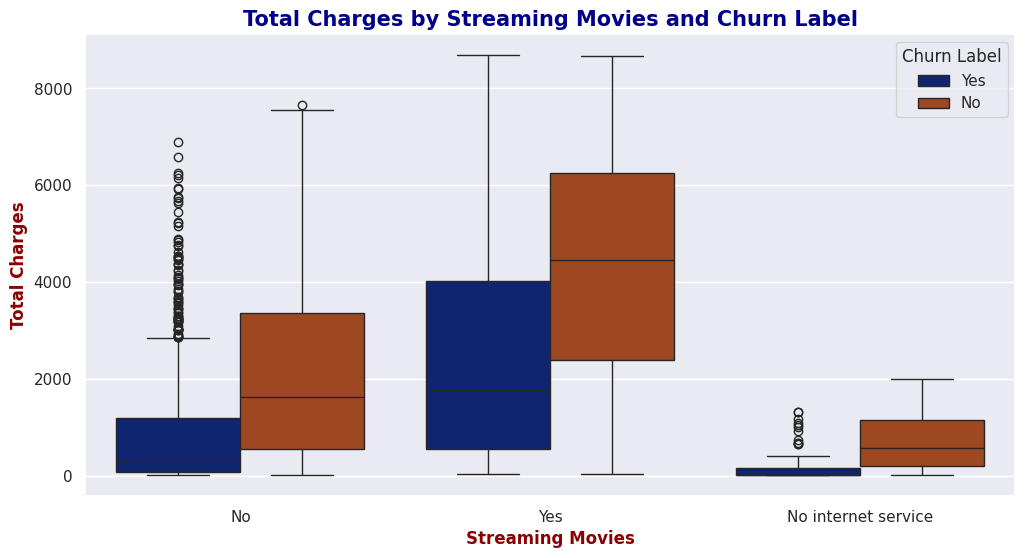

In [ ]:
box_plot(df, 'Streaming Movies', 'Total Charges', 'Churn Label')

In [ ]:
count_grouped_by_status(df, 'No', 'Streaming Movies')

Churn Label
No     1847
Yes     938
Name: Churn Label, dtype: int64

In [ ]:
count_grouped_by_status(df, 'Yes', 'Streaming Movies')

Churn Label
No     1914
Yes     818
Name: Churn Label, dtype: int64

In [ ]:
count_grouped_by_status(df, 'No internet service', 'Streaming Movies')

Churn Label
No     1413
Yes     113
Name: Churn Label, dtype: int64

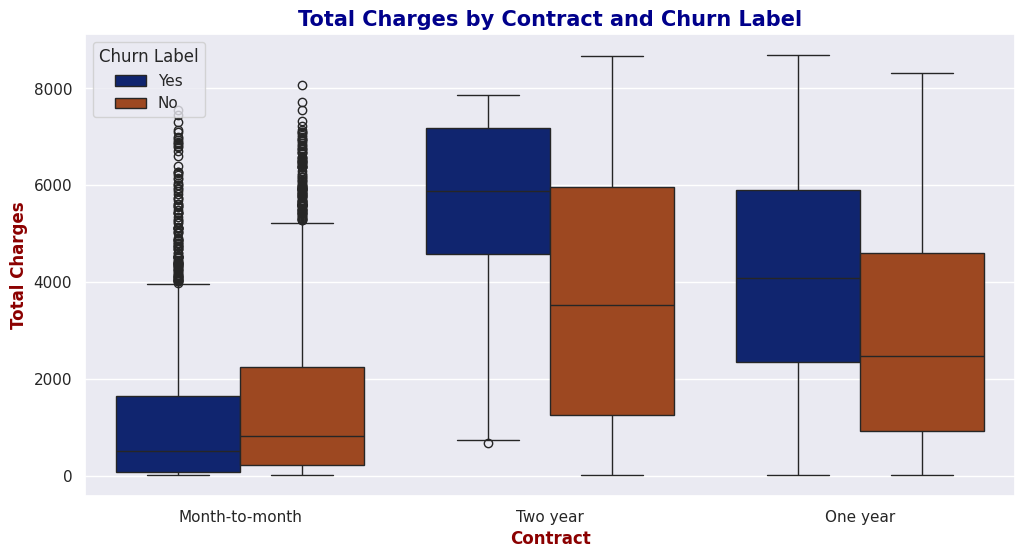

In [ ]:
box_plot(df, 'Contract', 'Total Charges', 'Churn Label')

* The "Two year" contract shows the largest difference in total charges between "Yes" and "No" churn, indicating churn has the greatest financial impact for longer-term contracts.
* The "One year" contract has the lowest total charges overall, suggesting it may be the most cost-effective option for customers.

In [ ]:
count_grouped_by_status(df, 'Month-to-month', 'Contract')

Churn Label
No     2220
Yes    1655
Name: Churn Label, dtype: int64

In [ ]:
count_grouped_by_status(df, 'Two year', 'Contract')

Churn Label
No     1647
Yes      48
Name: Churn Label, dtype: int64

In [ ]:
count_grouped_by_status(df, 'One year', 'Contract')

Churn Label
No     1307
Yes     166
Name: Churn Label, dtype: int64

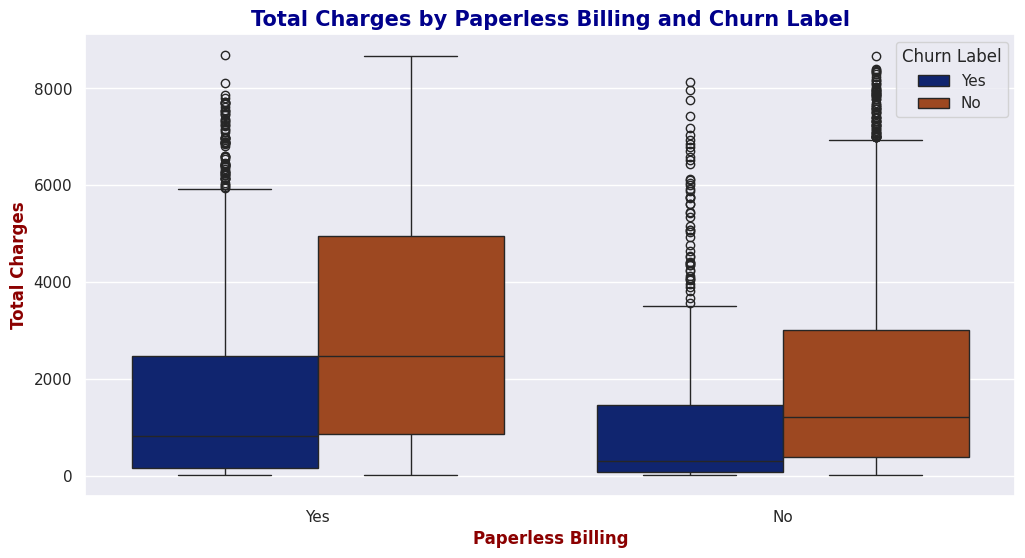

In [ ]:
box_plot(df, 'Paperless Billing', 'Total Charges', 'Churn Label')

In [ ]:
count_grouped_by_status(df, 'No', 'Paperless Billing')

Churn Label
No     2403
Yes     469
Name: Churn Label, dtype: int64

In [ ]:
count_grouped_by_status(df, 'Yes', 'Paperless Billing')

Churn Label
No     2771
Yes    1400
Name: Churn Label, dtype: int64

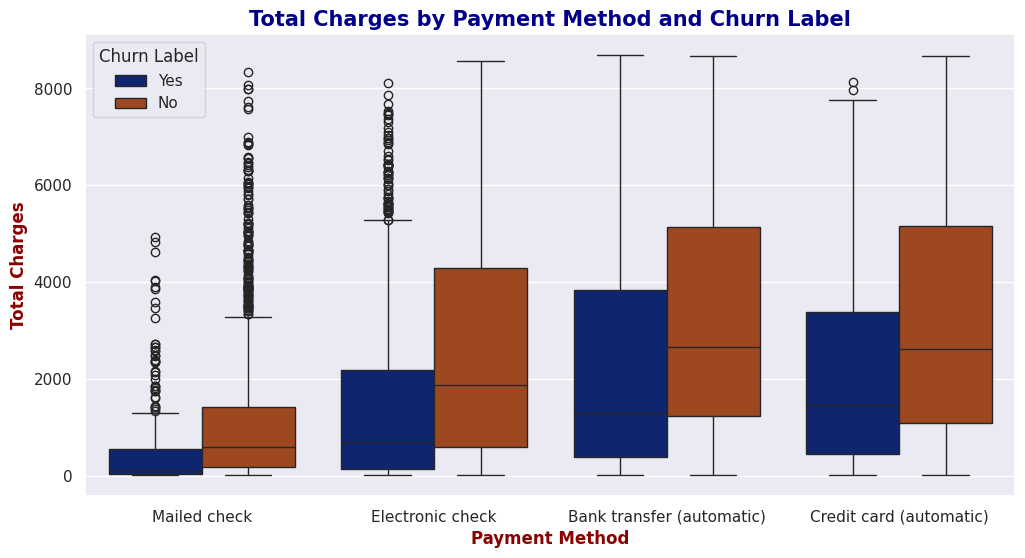

In [ ]:
box_plot(df, 'Payment Method', 'Total Charges', 'Churn Label')

In [ ]:
count_grouped_by_status(df, 'Mailed check', 'Payment Method')

Churn Label
No     1304
Yes     308
Name: Churn Label, dtype: int64

In [ ]:
count_grouped_by_status(df, 'Electronic check', 'Payment Method')

Churn Label
No     1294
Yes    1071
Name: Churn Label, dtype: int64

In [ ]:
count_grouped_by_status(df, 'Bank transfer (automatic)', 'Payment Method')

Churn Label
No     1286
Yes     258
Name: Churn Label, dtype: int64

In [ ]:
count_grouped_by_status(df, 'Credit card (automatic)', 'Payment Method')

Churn Label
No     1290
Yes     232
Name: Churn Label, dtype: int64

# 6. Feature Extraction <a id=6></a>

In [ ]:
# Create a copy of dataframe to perfome feature extraction/generation
df_copy = df.copy()

df_copy.head()

CustomerID  Count        Country       State         City  Zip Code  \
0  3668-QPYBK      1  United States  California  Los Angeles     90003   
1  9237-HQITU      1  United States  California  Los Angeles     90005   
2  9305-CDSKC      1  United States  California  Los Angeles     90006   
3  7892-POOKP      1  United States  California  Los Angeles     90010   
4  0280-XJGEX      1  United States  California  Los Angeles     90015   

                 Lat Long   Latitude   Longitude  Gender  ...        Contract  \
0  33.964131, -118.272783  33.964131 -118.272783    Male  ...  Month-to-month   
1   34.059281, -118.30742  34.059281 -118.307420  Female  ...  Month-to-month   
2  34.048013, -118.293953  34.048013 -118.293953  Female  ...  Month-to-month   
3  34.062125, -118.315709  34.062125 -118.315709  Female  ...  Month-to-month   
4  34.039224, -118.266293  34.039224 -118.266293    Male  ...  Month-to-month   

  Paperless Billing             Payment Method  Monthly Charges Total Charges  \
0               Yes               Mailed check            53.85        108.15   
1               Yes           Electronic check            70.70        151.65   
2               Yes           Electronic check            99.65         820.5   
3               Yes           Electronic check           104.80       3046.05   
4               Yes  Bank transfer (automatic)           103.70        5036.3   

  Churn Label Churn Value Churn Score  CLTV                   Churn Reason  
0         Yes           1          86  3239   Competitor made better offer  
1         Yes           1          67  2701                          Moved  
2         Yes           1          86  5372                          Moved  
3         Yes           1          84  5003                          Moved  
4         Yes           1          89  5340  Competitor had better devices  

[5 rows x 33 columns]

In [ ]:
df_copy['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')

In [ ]:
# Drop some useless varibales from copied dataframe

columns_to_drop = [
    'CustomerID',
    'Count',
    'Lat Long',
    'Zip Code',
    'City',
    'Churn Label',
    'Country',
    'State'
]

df_copy = df_copy.drop(columns=columns_to_drop)
df_copy.head(1)

Latitude   Longitude Gender Senior Citizen Partner Dependents  \
0  33.964131 -118.272783   Male             No      No         No   

   Tenure Months Phone Service Multiple Lines Internet Service  ...  \
0              2           Yes             No              DSL  ...   

  Streaming Movies        Contract Paperless Billing Payment Method  \
0               No  Month-to-month               Yes   Mailed check   

  Monthly Charges Total Charges Churn Value Churn Score  CLTV  \
0           53.85        108.15           1          86  3239   

                   Churn Reason  
0  Competitor made better offer  

[1 rows x 25 columns]

## 6.1 Clustering Based on Region <a id=6.1></a>

In [ ]:
from sklearn.cluster import KMeans

# Example: Creating clusters based on latitude and longitude for region grouping
def add_region_clusters(df, n_clusters=5):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    df['Region Cluster'] = kmeans.fit_predict(df[['Latitude', 'Longitude']])
    return df

In [ ]:
df_copy = add_region_clusters(df_copy)
df_copy.head()

Latitude   Longitude  Gender Senior Citizen Partner Dependents  \
0  33.964131 -118.272783    Male             No      No         No   
1  34.059281 -118.307420  Female             No      No        Yes   
2  34.048013 -118.293953  Female             No      No        Yes   
3  34.062125 -118.315709  Female             No     Yes        Yes   
4  34.039224 -118.266293    Male             No      No        Yes   

   Tenure Months Phone Service Multiple Lines Internet Service  ...  \
0              2           Yes             No              DSL  ...   
1              2           Yes             No      Fiber optic  ...   
2              8           Yes            Yes      Fiber optic  ...   
3             28           Yes            Yes      Fiber optic  ...   
4             49           Yes            Yes      Fiber optic  ...   

         Contract Paperless Billing             Payment Method  \
0  Month-to-month               Yes               Mailed check   
1  Month-to-month               Yes           Electronic check   
2  Month-to-month               Yes           Electronic check   
3  Month-to-month               Yes           Electronic check   
4  Month-to-month               Yes  Bank transfer (automatic)   

  Monthly Charges Total Charges Churn Value Churn Score  CLTV  \
0           53.85        108.15           1          86  3239   
1           70.70        151.65           1          67  2701   
2           99.65        820.50           1          86  5372   
3          104.80       3046.05           1          84  5003   
4          103.70       5036.30           1          89  5340   

                    Churn Reason  Region Cluster  
0   Competitor made better offer               1  
1                          Moved               1  
2                          Moved               1  
3                          Moved               1  
4  Competitor had better devices               1  

[5 rows x 26 columns]

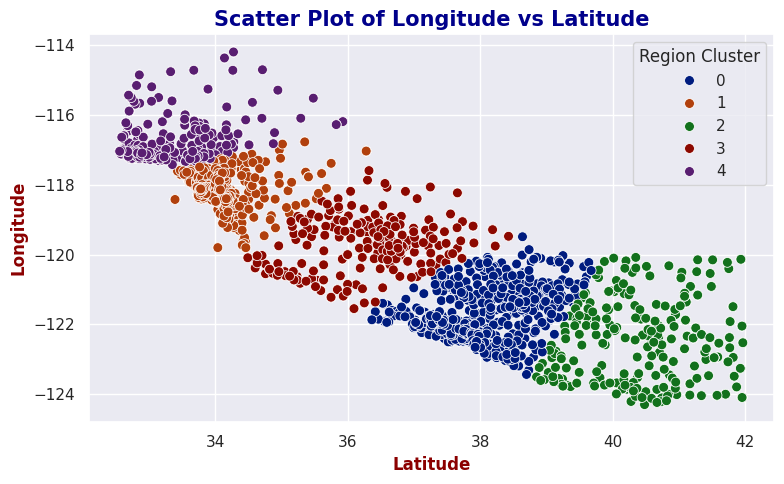

In [ ]:
scatter_plot(df_copy, "Latitude", "Longitude", hue_column='Region Cluster')

## 6.2 Average Monthly Spend <a id=6.2></a>

In [ ]:
df_copy['Total Charges'] = pd.to_numeric(df_copy['Total Charges'], errors='coerce')

In [ ]:
def calculate_avg_monthly_spend(df):
    df['Avg Monthly Spend'] = df['Total Charges'] / df['Tenure Months']
    df['Avg Monthly Spend'].fillna(0, inplace=True)  # Handle division by zero
    return df

df_copy = calculate_avg_monthly_spend(df_copy)
df_copy.head()

Latitude   Longitude  Gender Senior Citizen Partner Dependents  \
0  33.964131 -118.272783    Male             No      No         No   
1  34.059281 -118.307420  Female             No      No        Yes   
2  34.048013 -118.293953  Female             No      No        Yes   
3  34.062125 -118.315709  Female             No     Yes        Yes   
4  34.039224 -118.266293    Male             No      No        Yes   

   Tenure Months Phone Service Multiple Lines Internet Service  ...  \
0              2           Yes             No              DSL  ...   
1              2           Yes             No      Fiber optic  ...   
2              8           Yes            Yes      Fiber optic  ...   
3             28           Yes            Yes      Fiber optic  ...   
4             49           Yes            Yes      Fiber optic  ...   

  Paperless Billing             Payment Method Monthly Charges Total Charges  \
0               Yes               Mailed check           53.85        108.15   
1               Yes           Electronic check           70.70        151.65   
2               Yes           Electronic check           99.65        820.50   
3               Yes           Electronic check          104.80       3046.05   
4               Yes  Bank transfer (automatic)          103.70       5036.30   

  Churn Value Churn Score  CLTV                   Churn Reason Region Cluster  \
0           1          86  3239   Competitor made better offer              1   
1           1          67  2701                          Moved              1   
2           1          86  5372                          Moved              1   
3           1          84  5003                          Moved              1   
4           1          89  5340  Competitor had better devices              1   

   Avg Monthly Spend  
0          54.075000  
1          75.825000  
2         102.562500  
3         108.787500  
4         102.781633  

[5 rows x 27 columns]

The values of `Avg Monthly Spend` are almost same as `Monthly Charges`, but there are few cases that these two values might differ:

1. Billing Changes Over Time: If a customer’s monthly charges changed (e.g., due to plan upgrades, downgrades, or discounts), their average monthly spend would be different from the current monthly charges.

2. Promotional Offers or Discounts: If customers received discounts or promotional pricing in their initial months, their average spend might be lower than their current monthly charges.

3. Unpaid Months or Gaps: If a customer missed payments or had gaps in service, their average monthly spend may not align perfectly with their current monthly charges.

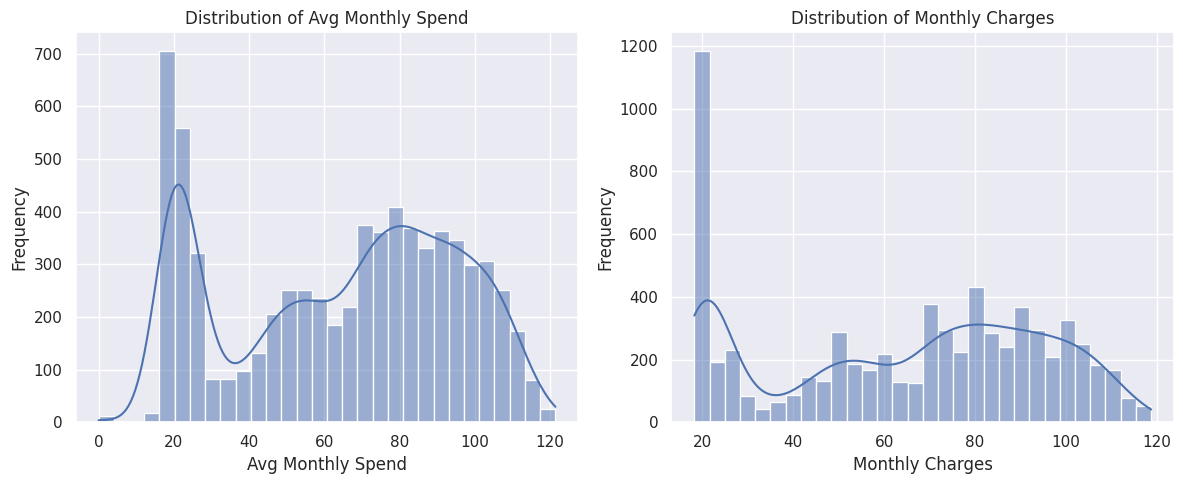

In [ ]:
# List of columns to plot
cols = ['Avg Monthly Spend', 'Monthly Charges']

# Set up the figure for side-by-side subplots
plt.figure(figsize=(12, 5))

# Loop through columns and create a subplot for each
for i, col in enumerate(cols):
    plt.subplot(1, 2, i + 1)  # Adjusting i + 1 to set the correct position
    sns.histplot(df_copy[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()  # Adjust spacing between plots
plt.show()

## 6.3 Serivce Bundling <a id=6.3></a>

In [ ]:
service_columns = ['Phone Service', 'Multiple Lines', 'Internet Service',
                   'Online Security', 'Online Backup', 'Device Protection',
                   'Tech Support', 'Streaming TV', 'Streaming Movies']

def calculate_total_services(df):
    df['Total Services Subscribed'] = df[service_columns].apply(lambda row: sum(row == 'Yes'), axis=1)
    return df

df_copy = calculate_total_services(df_copy)

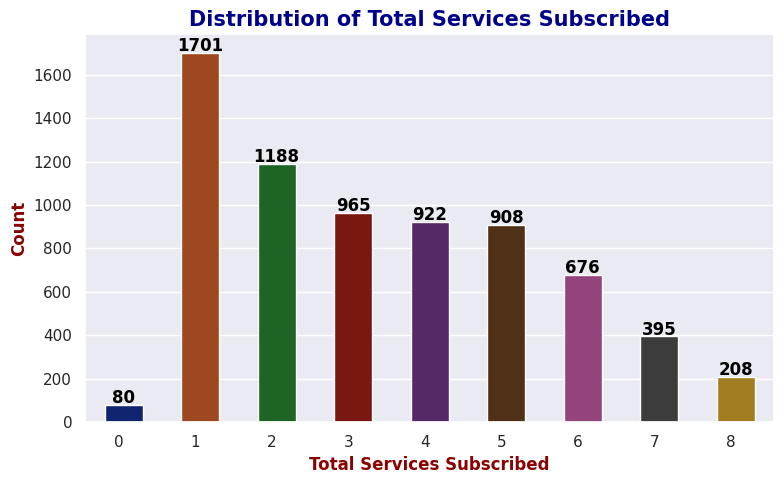

In [ ]:
plot_categorical_bar(df_copy, 'Total Services Subscribed')

## 6.3 Payment Method Recurrence <a id=6.3></a>

If a customer’s payment method is either "Bank transfer (automatic)" or "Credit card (automatic)", they are considered to be using a recurring payment method. **This column provides information about whether each customer's payment method is automatic (recurring) or not.**

In [ ]:
def add_payment_recurrence(df):
    recurring_methods = ['Bank transfer (automatic)', 'Credit card (automatic)']
    df['Recurring Payment'] = df['Payment Method'].apply(lambda x: 1 if x in recurring_methods else 0)
    return df

df_copy = add_payment_recurrence(df_copy)

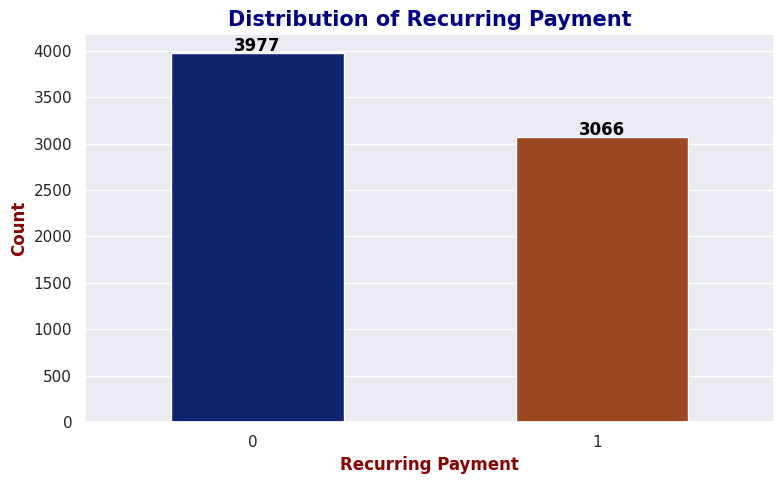

In [ ]:
plot_categorical_bar(df_copy, 'Recurring Payment')

## 6.4 Auto-Pay Indicator <a id=6.4></a>

The code assigns a value of 1 to the Auto-Pay column if both conditions are met:
1. The Paperless Billing column is set to "Yes".
2. The Recurring Payment column (created in a previous step) is set to 1 (indicating an automatic payment method, such as "Bank transfer (automatic)" or "Credit card (automatic)").
If either condition is not met, the Auto-Pay column is assigned a value of 0.


>The Auto-Pay column acts as a binary indicator, where 1 signifies that the customer is using an automatic, paperless billing method, and 0 indicates they are not.

In [ ]:
def add_auto_pay_indicator(df):
    df['Auto-Pay'] = ((df['Paperless Billing'] == 'Yes') & (df['Recurring Payment'] == 1)).astype(int)
    return df

df_copy = add_auto_pay_indicator(df_copy)

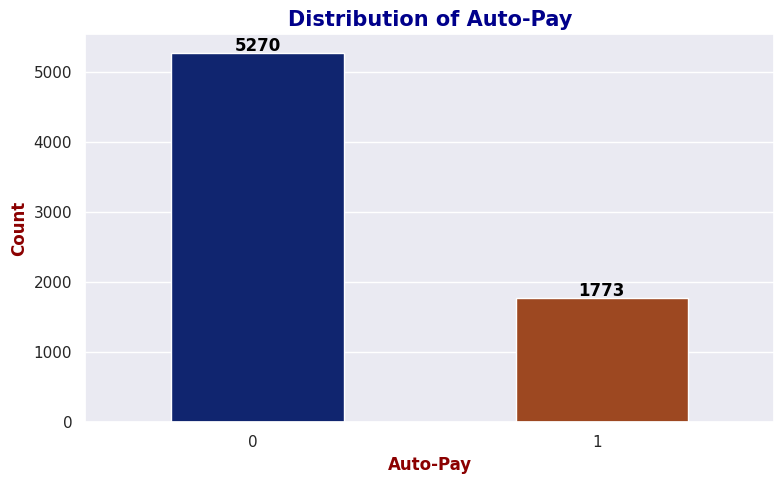

In [ ]:
plot_categorical_bar(df_copy, 'Auto-Pay')

## 6.4 Potential Upsell Flag <a id=6.4></a>

* Churn Score:	A value from 0-100 that is calculated using a predictive tool (e.g., IBM SPSS Modeler). The model incorporates multiple factors known to cause churn. The higher the score, the more likely the customer will churn.
* CLTV:	Customer Lifetime Value. A predicted CLTV is calculated using corporate formulas and existing data. Higher values indicate more valuable customers who should be monitored for churn.  

**The Upsell Potential column provides a binary flag (1 or 0) indicating customers who have both high churn risk and above-average lifetime value. This information can help identify high-value customers who may benefit from targeted offers or engagement strategies to increase revenue and retention.**

In [ ]:
def add_upsell_flag(df):
    df['Upsell Potential'] = ((df['Churn Score'] > 50) & (df['CLTV'] > df['CLTV'].mean())).astype(int)
    return df

df_copy = add_upsell_flag(df_copy)

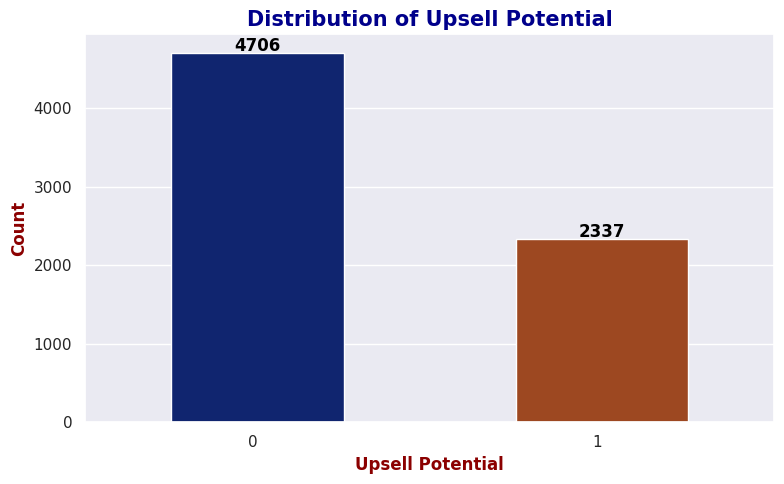

In [ ]:
plot_categorical_bar(df_copy, 'Upsell Potential')

## 6.5 Churn Probability Group <a id=6.5></a>

In [ ]:
def add_churn_score_group(df):
    bins = [0, 33, 66, 100]
    labels = ['Low', 'Medium', 'High']
    df['Churn Score Group'] = pd.cut(df['Churn Score'], bins=bins, labels=labels)
    return df

df_copy = add_churn_score_group(df_copy)

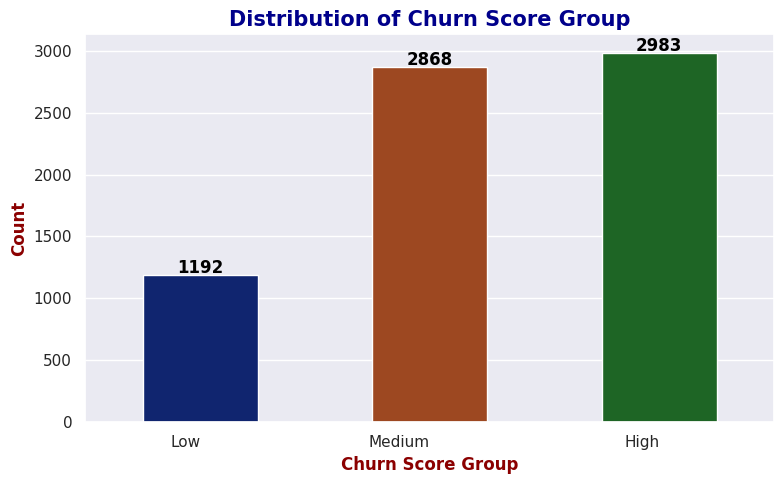

In [ ]:
plot_categorical_bar(df_copy, 'Churn Score Group')

## 6.6 Grouping Churn Reason <a id=6.6></a>

In [ ]:
# Define a function to categorize Churn Reasons
def categorize_churn_reason(reason):
    if pd.isna(reason):
        return 'Missing'

    reason = reason.lower()

    # Competitor related reasons
    if 'competitor' in reason:
        return 'Competitor'

    # Price and service related reasons
    elif 'price' in reason or 'charges' in reason or 'extra data' in reason or 'long distance' in reason or 'affordable' in reason:
        return 'Price & Service'

    # Support and service quality issues
    elif 'attitude' in reason or 'expertise' in reason or 'support' in reason or 'self-service' in reason:
        return 'Support & Service Quality'

    # Product and network related reasons
    elif 'network' in reason or 'product' in reason or 'limited range' in reason:
        return 'Product & Network'

    # Life changes
    elif 'moved' in reason or 'deceased' in reason:
        return 'Life Changes'

    # Unknown reasons
    elif "don't know" in reason:
        return 'Unknown'

    # Catch-all for any other reasons
    else:
        return 'Other'

In [ ]:
# Apply the function to the 'Churn Reason' column and create a new column 'Churn Reason Summary'
df_copy['Churn Reason Group'] = df_copy['Churn Reason'].apply(categorize_churn_reason)

df_copy['Churn Reason Group'].value_counts()

Churn Reason Group
Missing                      5174
Competitor                    621
Support & Service Quality     454
Product & Network             249
Price & Service               243
Unknown                       154
Other                          89
Life Changes                   59
Name: count, dtype: int64

# 7. WorldCloud of Churn Reason <a id=7></a>

In [ ]:
from wordcloud import WordCloud

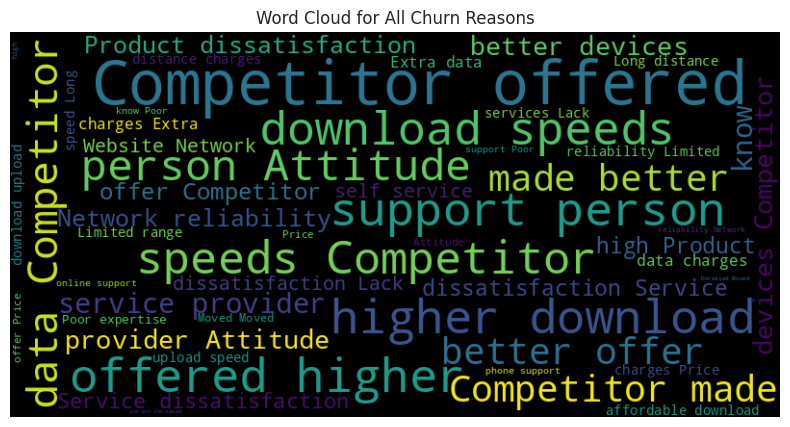

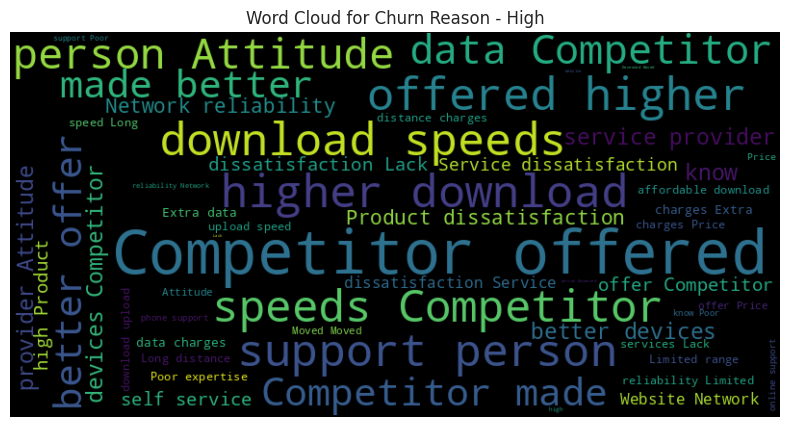

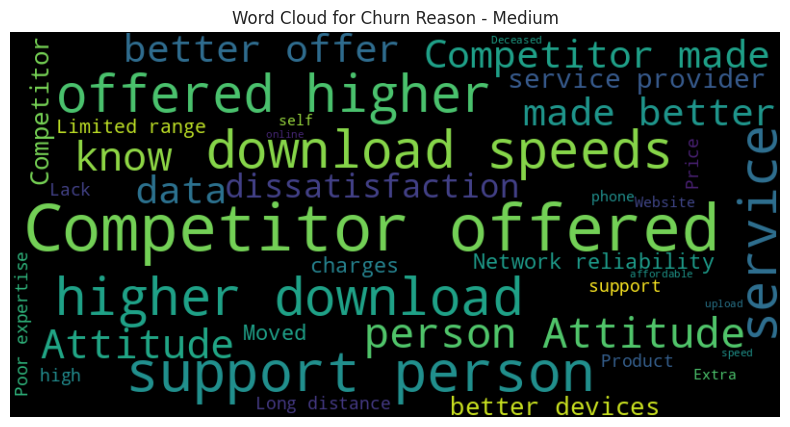

No churn reasons for group: Low


In [ ]:
# We need to filter out NaN values in 'Churn Reason' for the general word cloud
churn_reason_all = df_copy['Churn Reason'].dropna().str.cat(sep=' ')

# Generate the general word cloud
wordcloud_all = WordCloud(width=800, height=400, background_color='black').generate(churn_reason_all)

# Plotting the general word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_all, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for All Churn Reasons')
plt.show()

# Word Clouds Grouped by Churn Score Group
churn_score_groups = df_copy['Churn Score Group'].unique()

# Loop through each group in 'Churn Score Group' and generate a word cloud
for group in churn_score_groups:
    # Filter data for the current churn score group
    churn_reason_group = df_copy[df_copy['Churn Score Group'] == group]['Churn Reason'].dropna().str.cat(sep=' ')

    # Only generate a word cloud if there are valid churn reasons (non-empty)
    if churn_reason_group:
        wordcloud_group = WordCloud(width=800, height=400, background_color='black').generate(churn_reason_group)

        # Plotting the word cloud for the group
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud_group, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'Word Cloud for Churn Reason - {group}')
        plt.show()
    else:
        print(f'No churn reasons for group: {group}')


# 8. Modelling <a id=8></a>

In [ ]:
from sklearn.model_selection import (learning_curve, RandomizedSearchCV,
                                     GridSearchCV, cross_val_score,
                                     train_test_split)
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (classification_report, confusion_matrix, accuracy_score,
                             roc_curve, roc_auc_score)
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from imblearn.over_sampling import SMOTE

## 8.1 Encoding Categorical Variable <a id=8.1></a>

In [ ]:
features_to_ohe = ['Gender', 'Senior Citizen','Partner', 'Dependents', 'Phone Service',
   'Multiple Lines', 'Online Security',
   'Online Backup', 'Device Protection',
   'Tech Support', 'Streaming TV',
   'Streaming Movies', 'Paperless Billing']

ohe = OneHotEncoder(sparse_output=False, drop='first')
encoded_data = ohe.fit_transform(df_copy[features_to_ohe])
encoded_data_df = pd.DataFrame(encoded_data,
                               columns=ohe.get_feature_names_out(features_to_ohe))
df_encoded = df_copy.drop(columns=features_to_ohe)
df_encoded = pd.concat([df_copy, encoded_data_df], axis=1)

In [ ]:
df_encoded.drop(columns=features_to_ohe, inplace=True)

In [ ]:
# LabelEncoder
features_to_le = ['Contract', 'Churn Score Group',
                  'Internet Service', 'Payment Method', 'Churn Reason Group']

le = LabelEncoder()
for feature in features_to_le:
    df_encoded[feature] = le.fit_transform(df_encoded[feature])

In [ ]:
df_encoded.drop(columns=features_to_le, inplace=True)

## 8.1 Split Dependent/Independent Variables <a id=8.1></a>

In [ ]:
df_encoded.dropna(subset=['Total Charges'], axis=0, inplace=True)

In [ ]:
X = df_encoded.drop(columns=['Churn Value', 'Churn Reason'], axis=1)
y = df_encoded['Churn Value']

print(f"X Shape: {X.shape}")
print(f"y Shape: {y.shape}")

X Shape: (7032, 33)
y Shape: (7032,)


## 8.2 Train/Test/Validation Sets <a id=8.2></a>

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Split Validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Check the shape of the splits
print(f"X_train Shape: {X_train.shape}")
print(f"X_val Shape: {X_val.shape}")
print(f"X_test Shape: {X_test.shape}")
print(f"y_train Shape: {y_train.shape}")
print(f"y_val Shape: {y_val.shape}")
print(f"y_test Shape: {y_test.shape}")

X_train Shape: (4500, 33)
X_val Shape: (1125, 33)
X_test Shape: (1407, 33)
y_train Shape: (4500,)
y_val Shape: (1125,)
y_test Shape: (1407,)


## 8.3 XGBClassifier <a id=8.3></a>

In [ ]:
from sklearn.metrics import accuracy_score

# Initialize the model
xgb_model = XGBClassifier(random_state=42)

# Train the model on the training data
xgb_model.fit(X_train, y_train)

# Predict on the validation data
y_val_pred = xgb_model.predict(X_val)

Initial Model Validation Accuracy: 0.9288888888888889


Classification Report:

               precision    recall  f1-score   support

           0       0.93      0.97      0.95       829
           1       0.91      0.81      0.86       296

    accuracy                           0.93      1125
   macro avg       0.92      0.89      0.90      1125
weighted avg       0.93      0.93      0.93      1125



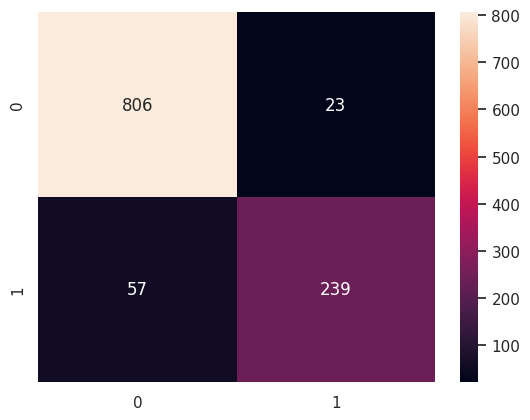

In [ ]:
# Evaluate accuracy on the validation set
cnf_matrix = confusion_matrix(y_val, y_val_pred)
sns.heatmap(cnf_matrix, annot=True, fmt="d")

val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Initial Model Validation Accuracy: {val_accuracy}")
print(f"\n\nClassification Report:\n\n {classification_report(y_val, y_val_pred)}")

___Hyperparameter Tuning___

In [ ]:
# Define the hyperparameter grid
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 6, 10],
    'n_estimators': [100, 200, 300],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

random_search = RandomizedSearchCV(estimator=XGBClassifier(random_state=42),
                                   param_distributions=param_grid,
                                   scoring='accuracy',
                                   cv=5,
                                   verbose=1,
                                   n_jobs=-1)

random_search.fit(X_val, y_val)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=42, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.7, 0.8, 1.0],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 6, 10],
                                        'n_estimators': [100, 200, 300],
                                        'subsample': [0.7, 0.8, 1.0]},
                   scoring='accuracy', verbose=1)

___Train New Model___

In [ ]:
# Get the best parameters from grid search
best_params = random_search.best_params_
best_estimator = random_search.best_estimator_
print(f"Best Hyperparameters: {best_params}")

Best Hyperparameters: {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.05, 'colsample_bytree': 0.8}


Initial Model Validation Accuracy: 0.9253333333333333


Classification Report:

               precision    recall  f1-score   support

           0       0.93      0.97      0.95       829
           1       0.91      0.80      0.85       296

    accuracy                           0.93      1125
   macro avg       0.92      0.88      0.90      1125
weighted avg       0.92      0.93      0.92      1125



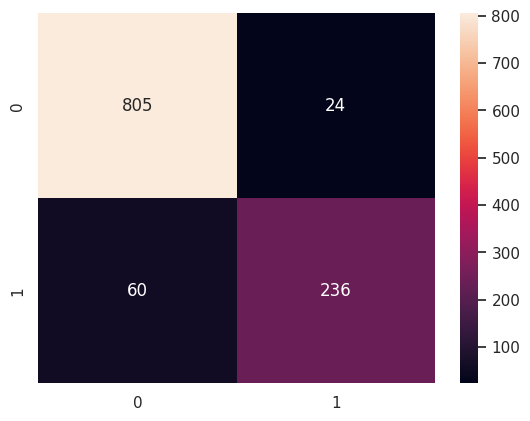

In [ ]:
xgb_tuned = XGBClassifier(**best_params, random_state=42)
xgb_tuned.fit(X_train, y_train)
y_pred_tuned = xgb_tuned.predict(X_val)

# Evaluate accuracy on the validation set
cnf_matrix = confusion_matrix(y_val, y_pred_tuned)
sns.heatmap(cnf_matrix, annot=True, fmt="d")

val_accuracy = accuracy_score(y_val, y_pred_tuned)
print(f"Initial Model Validation Accuracy: {val_accuracy}")
print(f"\n\nClassification Report:\n\n {classification_report(y_val, y_pred_tuned)}")

__Cross Validation__

In [ ]:
cv_scores = cross_val_score(xgb_tuned, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross Validation Scores: {cv_scores}")
print(f"Cross Validation Mean: {cv_scores.mean()}")

Cross Validation Scores: [0.92666667 0.92555556 0.93       0.93888889 0.92      ]
Cross Validation Mean: 0.9282222222222222


**Learning Curve**

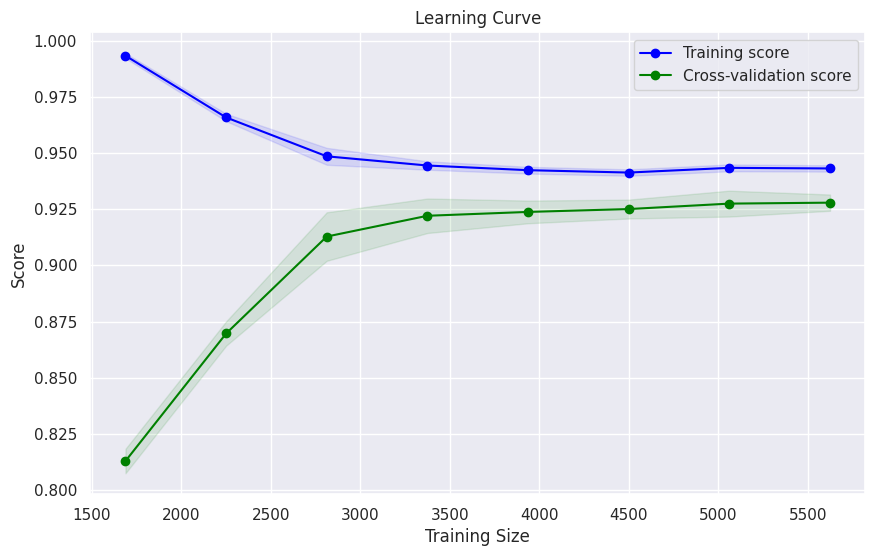

In [ ]:
# Get learning curve data
train_sizes, train_scores, val_scores = learning_curve(
    xgb_tuned, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy', random_state=42
)

# Calculate mean and std for training and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color="blue", label="Training score")
plt.plot(train_sizes, val_scores_mean, 'o-', color="green", label="Cross-validation score")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, color="blue", alpha=0.1)
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, color="green", alpha=0.1)
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.show()

## 8.4 RandomForestClassifier <a id=8.4></a>



Classification Report:

               precision    recall  f1-score   support

           0       0.93      0.97      0.95       829
           1       0.90      0.78      0.84       296

    accuracy                           0.92      1125
   macro avg       0.91      0.88      0.89      1125
weighted avg       0.92      0.92      0.92      1125

Initial Model Validation Accuracy: 0.92


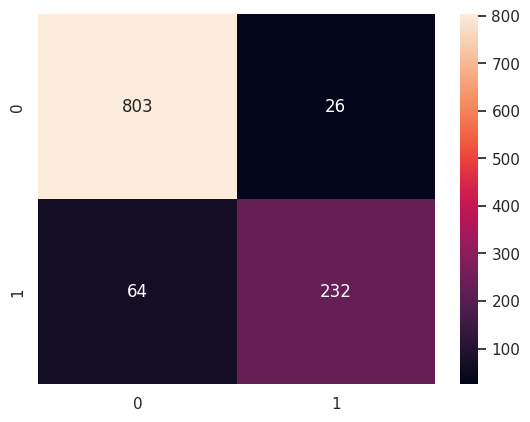

In [ ]:
# RandomForestClassifier Instance
rf_model = RandomForestClassifier(random_state=42)
# Train RandomForest
rf_model.fit(X_train, y_train)
# Prediction on validation set
y_pred_val_rf = rf_model.predict(X_val)

# Evaluate accuracy of rf model
# confusion matrix & classification report
cnf_matrix = confusion_matrix(y_val, y_pred_val_rf)
sns.heatmap(cnf_matrix, annot=True, fmt="d")

print(f"\n\nClassification Report:\n\n {classification_report(y_val, y_pred_val_rf)}")

# accuracy score
val_accuracy = accuracy_score(y_val, y_pred_val_rf)
print(f"Initial Model Validation Accuracy: {val_accuracy}")

__Hyperparameter Tunning__

In [ ]:
rf_tuned = RandomForestClassifier(random_state=42)


params = {
    'n_estimators': [100, 200, 300, 350],
    'max_depth': [2, 4, 8, 10,],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [1, 3, 5, 7]
}

random_search = RandomizedSearchCV(estimator=rf_tuned,
                                   param_distributions=params,
                                   scoring='accuracy',
                                   cv=5,
                                   verbose=1,
                                   n_jobs=-1)

random_search.fit(X_val, y_val)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [2, 4, 8, 10],
                                        'min_samples_leaf': [1, 3, 5, 7],
                                        'min_samples_split': [2, 4, 6, 8],
                                        'n_estimators': [100, 200, 300, 350]},
                   scoring='accuracy', verbose=1)

__Train Tuned Model__

In [ ]:
best_params = random_search.best_params_
print(best_params)

{'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_depth': 10}


Initial Model Validation Accuracy: 0.9262222222222222


Classification Report:

               precision    recall  f1-score   support

           0       0.93      0.97      0.95       829
           1       0.92      0.79      0.85       296

    accuracy                           0.93      1125
   macro avg       0.92      0.88      0.90      1125
weighted avg       0.93      0.93      0.92      1125



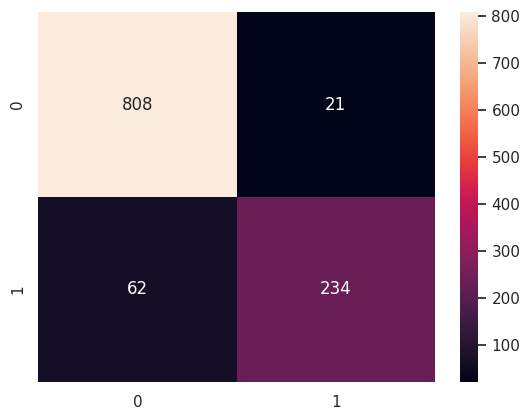

In [ ]:
# Randomforest model with tuned hyperparameters
rf_tuned = RandomForestClassifier(**best_params, random_state=42)
# Train tuned randomforstes model
rf_tuned.fit(X_train, y_train)
# Prediction on validation
y_pred_tuned_rf = rf_tuned.predict(X_val)

# Evaluate accuracy on the validation set
cnf_matrix = confusion_matrix(y_val, y_pred_tuned_rf)
sns.heatmap(cnf_matrix, annot=True, fmt="d")

val_accuracy = accuracy_score(y_val, y_pred_tuned_rf)
print(f"Initial Model Validation Accuracy: {val_accuracy}")
print(f"\n\nClassification Report:\n\n {classification_report(y_val, y_pred_tuned_rf)}")

In [ ]:
cv_scores = cross_val_score(rf_tuned, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross Validation Scores: {cv_scores}")
print(f"Cross Validation Mean: {cv_scores.mean()}")

Cross Validation Scores: [0.93       0.92444444 0.92888889 0.93888889 0.91777778]
Cross Validation Mean: 0.9280000000000002


__Feature Importance__

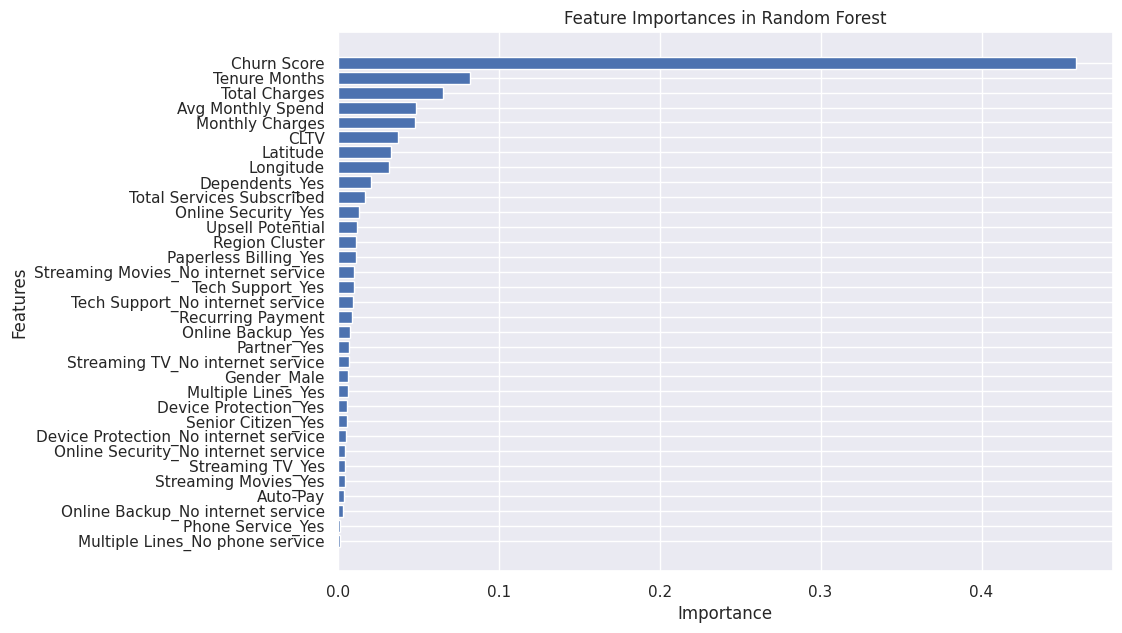

In [ ]:
importances = rf_model.feature_importances_

# Convert to DataFrame for readability
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(10, 7))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importances in Random Forest')
plt.gca().invert_yaxis()  # Most important at the top
plt.show()

**Learning Curve**

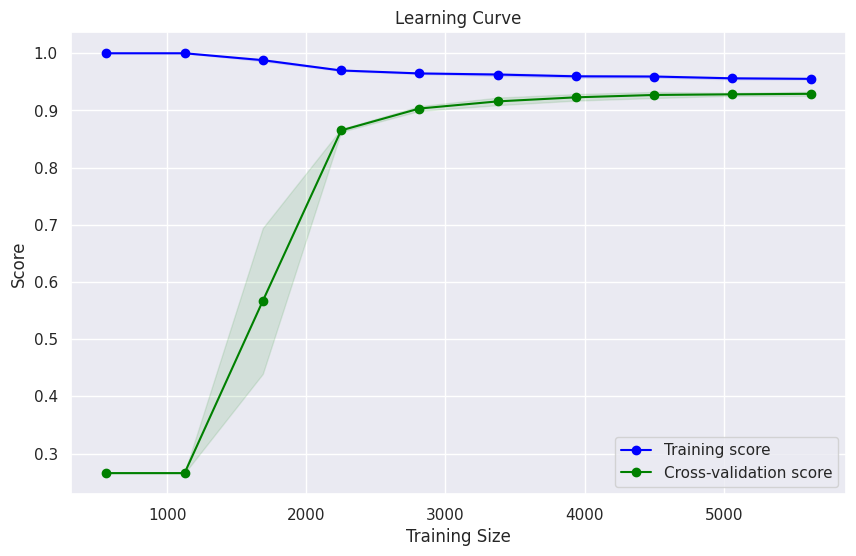

In [ ]:
# Get learning curve data
train_sizes, train_scores, val_scores = learning_curve(
    rf_tuned, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy', random_state=42
)

# Calculate mean and std for training and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color="blue", label="Training score")
plt.plot(train_sizes, val_scores_mean, 'o-', color="green", label="Cross-validation score")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, color="blue", alpha=0.1)
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, color="green", alpha=0.1)
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.show()


## 8.5 Balancing Classes Using SMOTE <a id=8.5></a>

In [ ]:
# Creating SMOTE instance
smote = SMOTE(random_state=42)
# Perfomr Sample Balancing
X_res, y_res = smote.fit_resample(X, y)

# Split Train/Test/Validation Sets
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_res, y_res, test_size=0.2, random_state=42)
X_train_smote, X_val_smote, y_train_smote, y_val_smote = train_test_split(X_train_smote, y_train_smote, test_size=0.2, random_state=42)

**Train New Model With Balanced Data**

In [ ]:
rf_tuned_smote = RandomForestClassifier(random_state=42)


params = {
    'n_estimators': [100, 200, 300, 350],
    'max_depth': [2, 4, 8, 10,],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [1, 3, 5, 7]
}

random_search = RandomizedSearchCV(estimator=rf_tuned_smote,
                                   param_distributions=params,
                                   scoring='accuracy',
                                   cv=5,
                                   verbose=1,
                                   n_jobs=-1)

random_search.fit(X_val_smote, y_val_smote)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [2, 4, 8, 10],
                                        'min_samples_leaf': [1, 3, 5, 7],
                                        'min_samples_split': [2, 4, 6, 8],
                                        'n_estimators': [100, 200, 300, 350]},
                   scoring='accuracy', verbose=1)

Initial Model Validation Accuracy: 0.9521791767554479


Classification Report:

               precision    recall  f1-score   support

           0       0.96      0.94      0.95       806
           1       0.94      0.97      0.95       846

    accuracy                           0.95      1652
   macro avg       0.95      0.95      0.95      1652
weighted avg       0.95      0.95      0.95      1652



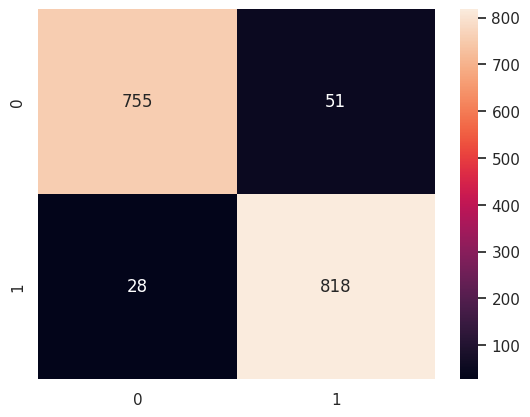

In [ ]:
# Randomforest model with tuned hyperparameters
rf_tuned_smote = RandomForestClassifier(**best_params, random_state=42)
# Train tuned randomforstes model
rf_tuned_smote.fit(X_train_smote, y_train_smote)
# Prediction on validation
y_pred_tuned_rf = rf_tuned_smote.predict(X_val_smote)

# Evaluate accuracy on the validation set
cnf_matrix = confusion_matrix(y_val_smote, y_pred_tuned_rf)
sns.heatmap(cnf_matrix, annot=True, fmt="d")

val_accuracy = accuracy_score(y_val_smote, y_pred_tuned_rf)
print(f"Initial Model Validation Accuracy: {val_accuracy}")
print(f"\n\nClassification Report:\n\n {classification_report(y_val_smote, y_pred_tuned_rf)}")

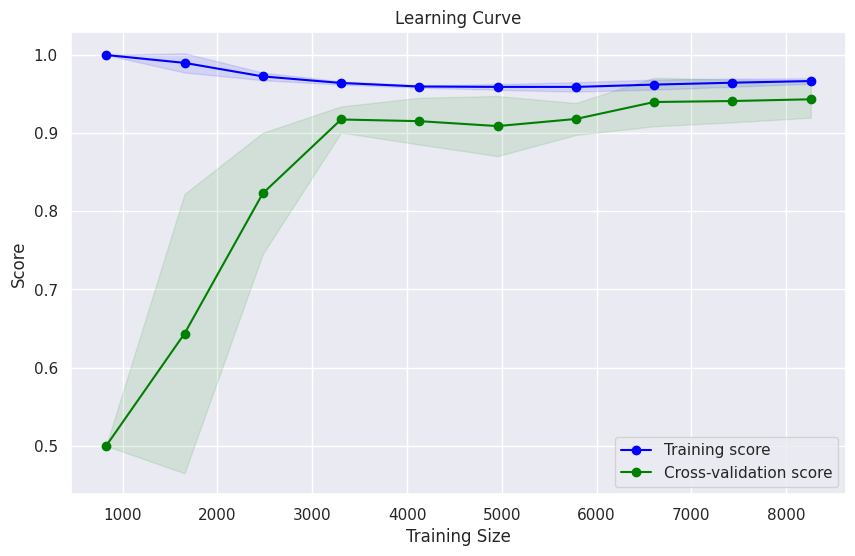

In [ ]:
# Get learning curve data
train_sizes, train_scores, val_scores = learning_curve(
    rf_tuned_smote, X_res, y_res, cv=5, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy', random_state=42
)

# Calculate mean and std for training and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color="blue", label="Training score")
plt.plot(train_sizes, val_scores_mean, 'o-', color="green", label="Cross-validation score")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, color="blue", alpha=0.1)
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, color="green", alpha=0.1)
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.show()


# 9. Add Churn Probability To DataFrame <a id=9></a>

In [ ]:
# Get the churn probability for each sample in the entire dataset
churn_probabilities = rf_tuned_smote.predict_proba(X)[:, 1]  # Column 1 represents the probability of the positive class (churn)

# Add churn probability as a new column to the original dataset
df_encoded['Churn_Probability'] = churn_probabilities

# Display the updated dataset with the new Churn_Probability column
df_encoded.head()

Latitude   Longitude  Tenure Months  Monthly Charges  Total Charges  \
0  33.964131 -118.272783              2            53.85         108.15   
1  34.059281 -118.307420              2            70.70         151.65   
2  34.048013 -118.293953              8            99.65         820.50   
3  34.062125 -118.315709             28           104.80        3046.05   
4  34.039224 -118.266293             49           103.70        5036.30   

   Churn Value  Churn Score  CLTV                   Churn Reason  \
0            1           86  3239   Competitor made better offer   
1            1           67  2701                          Moved   
2            1           86  5372                          Moved   
3            1           84  5003                          Moved   
4            1           89  5340  Competitor had better devices   

   Region Cluster  ...  Device Protection_No internet service  \
0               1  ...                                    0.0   
1               1  ...                                    0.0   
2               1  ...                                    0.0   
3               1  ...                                    0.0   
4               1  ...                                    0.0   

   Device Protection_Yes  Tech Support_No internet service  Tech Support_Yes  \
0                    0.0                               0.0               0.0   
1                    0.0                               0.0               0.0   
2                    1.0                               0.0               0.0   
3                    1.0                               0.0               1.0   
4                    1.0                               0.0               0.0   

   Streaming TV_No internet service  Streaming TV_Yes  \
0                               0.0               0.0   
1                               0.0               0.0   
2                               0.0               1.0   
3                               0.0               1.0   
4                               0.0               1.0   

   Streaming Movies_No internet service  Streaming Movies_Yes  \
0                                   0.0                   0.0   
1                                   0.0                   0.0   
2                                   0.0                   1.0   
3                                   0.0                   1.0   
4                                   0.0                   1.0   

   Paperless Billing_Yes  Churn_Probability  
0                    1.0           0.836415  
1                    1.0           0.819305  
2                    1.0           0.800721  
3                    1.0           0.556939  
4                    1.0           0.607024  

[5 rows x 36 columns]

# 10. Save Models And Data <a id=10></a>

In [ ]:
# Save Data
df_encoded.to_csv('predicted_churn.csv', index='ignore')

In [ ]:
# Save Models
import joblib
# Save RandomForest Model With Data Balance
joblib.dump(rf_tuned_smote, 'rf_model_smote.pkl')

# Save RandomForest Model Without Data Balancing
joblib.dump(rf_tuned, 'rf_model.pkl')

['rf_model.pkl']